## First Steps

In this notebook we will explore the [Global trends in mental health](https://www.kaggle.com/datasets/imtkaggleteam/mental-health?select=1-+mental-illnesses-prevalence.csv) dataset

Our research question is the impact of Social Media and AI on mental health 

This dataset is described [here](https://github.com/MIT-Emerging-Talent/2024-group-03-cdsp/blob/main/milestones/2.Data_Collection/Global_Trends_in_Mental_Health_Dataset_Discription.md)

So first we will do some data cleaning, then try to do EDA for this data, aggregate. 
Then we will add data concerning usage of social media and build plots, and see if there can be found any patterns


In [2]:

# this ! execute terminal command in jupyter
# uncomment this lines if you don't have pandas or matplotlib

#!pip install pandas
#!pip install matplotlib



In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

C:\Users\sirius\AppData\Local\Temp\ipykernel_14004\1521273946.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [4]:
pd.__version__

'2.2.0'

In [5]:
## Data import and cleaning

To do the following steps we need to download the data from the [dataset](https://www.kaggle.com/datasets/imtkaggleteam/mental-health?select=1-+mental-illnesses-prevalence.csv)
And extract it to the ```/kaggle2019``` folder


In [6]:
GLOBAL_TRENDS_DS_PATH='kaggle2019/'

In [7]:
global_trends=pd.read_csv(GLOBAL_TRENDS_DS_PATH+"1- mental-illnesses-prevalence.csv")

In [8]:
global_trends.head()

Entity Code  Year  \
0  Afghanistan  AFG  1990   
1  Afghanistan  AFG  1991   
2  Afghanistan  AFG  1992   
3  Afghanistan  AFG  1993   
4  Afghanistan  AFG  1994   

   Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized  \
0                                           0.223206                                   
1                                           0.222454                                   
2                                           0.221751                                   
3                                           0.220987                                   
4                                           0.220183                                   

   Depressive disorders (share of population) - Sex: Both - Age: Age-standardized  \
0                                           4.996118                                
1                                           4.989290                                
2                                           4.981346                                
3                                           4.976958                                
4                                           4.977782                                

   Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized  \
0                                           4.713314                             
1                                           4.702100                             
2                                           4.683743                             
3                                           4.673549                             
4                                           4.670810                             

   Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized  \
0                                           0.703023                             
1                                           0.702069                             
2                                           0.700792                             
3                                           0.700087                             
4                                           0.699898                             

   Eating disorders (share of population) - Sex: Both - Age: Age-standardized  
0                                           0.127700                           
1                                           0.123256                           
2                                           0.118844                           
3                                           0.115089                           
4                                           0.111815

In [9]:
global_trends

Entity Code  Year  \
0     Afghanistan  AFG  1990   
1     Afghanistan  AFG  1991   
2     Afghanistan  AFG  1992   
3     Afghanistan  AFG  1993   
4     Afghanistan  AFG  1994   
...           ...  ...   ...   
6415     Zimbabwe  ZWE  2015   
6416     Zimbabwe  ZWE  2016   
6417     Zimbabwe  ZWE  2017   
6418     Zimbabwe  ZWE  2018   
6419     Zimbabwe  ZWE  2019   

      Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized  \
0                                              0.223206                                   
1                                              0.222454                                   
2                                              0.221751                                   
3                                              0.220987                                   
4                                              0.220183                                   
...                                                 ...                                   
6415                                           0.201042                                   
6416                                           0.201319                                   
6417                                           0.201639                                   
6418                                           0.201976                                   
6419                                           0.202482                                   

      Depressive disorders (share of population) - Sex: Both - Age: Age-standardized  \
0                                              4.996118                                
1                                              4.989290                                
2                                              4.981346                                
3                                              4.976958                                
4                                              4.977782                                
...                                                 ...                                
6415                                           3.407624                                
6416                                           3.410755                                
6417                                           3.411965                                
6418                                           3.406929                                
6419                                           3.395476                                

      Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized  \
0                                              4.713314                             
1                                              4.702100                             
2                                              4.683743                             
3                                              4.673549                             
4                                              4.670810                             
...                                                 ...                             
6415                                           3.184012                             
6416                                           3.187148                             
6417                                           3.188418                             
6418                                           3.172111                             
6419                                           3.137017                             

      Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized  \
0                                              0.703023                             
1                                              0.702069                             
2                                              0.700792                             
3                                              0.700087                             
4                             

In [10]:
### Now lets make the column names shorter and clear

In [11]:

global_trends.columns = global_trends.columns.str.lower().str.replace(' ', '_')

In [12]:
global_trends.columns

Index(['entity', 'code', 'year',
       'schizophrenia_disorders_(share_of_population)_-_sex:_both_-_age:_age-standardized',
       'depressive_disorders_(share_of_population)_-_sex:_both_-_age:_age-standardized',
       'anxiety_disorders_(share_of_population)_-_sex:_both_-_age:_age-standardized',
       'bipolar_disorders_(share_of_population)_-_sex:_both_-_age:_age-standardized',
       'eating_disorders_(share_of_population)_-_sex:_both_-_age:_age-standardized'],
      dtype='object')

In [13]:
global_trends=global_trends.rename(columns = {'schizophrenia_disorders_(share_of_population)_-_sex:_both_-_age:_age-standardized':'schizophrenia',
       'depressive_disorders_(share_of_population)_-_sex:_both_-_age:_age-standardized':'depressive_disorders',
       'anxiety_disorders_(share_of_population)_-_sex:_both_-_age:_age-standardized':'anxiety_disorders',
       'bipolar_disorders_(share_of_population)_-_sex:_both_-_age:_age-standardized':'bipolar_disorders',
       'eating_disorders_(share_of_population)_-_sex:_both_-_age:_age-standardized':'eating_disorders'
           })

See if there is a missing values

In [14]:
global_trends.isna().sum()

entity                    0
code                    270
year                      0
schizophrenia             0
depressive_disorders      0
anxiety_disorders         0
bipolar_disorders         0
eating_disorders          0
dtype: int64

In [15]:
global_trends.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6420 entries, 0 to 6419
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   entity                6420 non-null   object 
 1   code                  6150 non-null   object 
 2   year                  6420 non-null   int64  
 3   schizophrenia         6420 non-null   float64
 4   depressive_disorders  6420 non-null   float64
 5   anxiety_disorders     6420 non-null   float64
 6   bipolar_disorders     6420 non-null   float64
 7   eating_disorders      6420 non-null   float64
dtypes: float64(5), int64(1), object(2)
memory usage: 401.4+ KB


In [16]:
global_trends.head()

entity code  year  schizophrenia  depressive_disorders  \
0  Afghanistan  AFG  1990       0.223206              4.996118   
1  Afghanistan  AFG  1991       0.222454              4.989290   
2  Afghanistan  AFG  1992       0.221751              4.981346   
3  Afghanistan  AFG  1993       0.220987              4.976958   
4  Afghanistan  AFG  1994       0.220183              4.977782   

   anxiety_disorders  bipolar_disorders  eating_disorders  
0           4.713314           0.703023          0.127700  
1           4.702100           0.702069          0.123256  
2           4.683743           0.700792          0.118844  
3           4.673549           0.700087          0.115089  
4           4.670810           0.699898          0.111815

In [17]:
# No need for 'code' column

global_trends.drop(columns='code',inplace=True)

In [18]:
global_trends

entity  year  schizophrenia  depressive_disorders  \
0     Afghanistan  1990       0.223206              4.996118   
1     Afghanistan  1991       0.222454              4.989290   
2     Afghanistan  1992       0.221751              4.981346   
3     Afghanistan  1993       0.220987              4.976958   
4     Afghanistan  1994       0.220183              4.977782   
...           ...   ...            ...                   ...   
6415     Zimbabwe  2015       0.201042              3.407624   
6416     Zimbabwe  2016       0.201319              3.410755   
6417     Zimbabwe  2017       0.201639              3.411965   
6418     Zimbabwe  2018       0.201976              3.406929   
6419     Zimbabwe  2019       0.202482              3.395476   

      anxiety_disorders  bipolar_disorders  eating_disorders  
0              4.713314           0.703023          0.127700  
1              4.702100           0.702069          0.123256  
2              4.683743           0.700792          0.118844  
3              4.673549           0.700087          0.115089  
4              4.670810           0.699898          0.111815  
...                 ...                ...               ...  
6415           3.184012           0.538596          0.095652  
6416           3.187148           0.538593          0.096662  
6417           3.188418           0.538589          0.097330  
6418           3.172111           0.538585          0.097909  
6419           3.137017           0.538580          0.098295  

[6420 rows x 7 columns]

### Comparing with similar dataset

We have another dataset in other source:
[Mental health Depression disorder Data](https://data.world/vizzup/mental-health-depression-disorder-data/workspace/file?filename=Mental+health+Depression+disorder+Data.xlsx)

It looks like it may be from different source, and it is dated 1990 - 2017

let's compare them:

This is .describe for the other dataset:
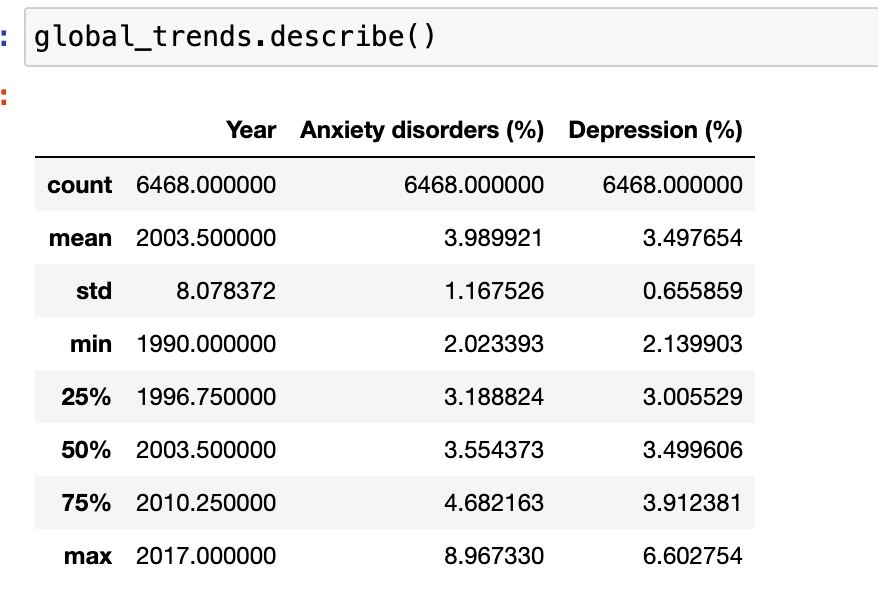

### this is .describe of our dataset:

In [19]:
# and this is for ours, from 1990 - 2017 and within some different selection of countries:
global_trends.describe()

year  schizophrenia  depressive_disorders  anxiety_disorders  \
count  6420.000000    6420.000000           6420.000000        6420.000000   
mean   2004.500000       0.266604              3.767036           4.101840   
std       8.656116       0.039383              0.925286           1.050543   
min    1990.000000       0.188416              1.522333           1.879996   
25%    1997.000000       0.242267              3.080036           3.425846   
50%    2004.500000       0.273477              3.636772           3.939547   
75%    2012.000000       0.286575              4.366252           4.564164   
max    2019.000000       0.462045              7.645899           8.624634   

       bipolar_disorders  eating_disorders  
count        6420.000000       6420.000000  
mean            0.636968          0.195664  
std             0.233391          0.138380  
min             0.181667          0.044780  
25%             0.520872          0.096416  
50%             0.579331          0.144150  
75%             0.844406          0.251167  
max             1.506730          1.031688

So, inspecting further we found small difference in data, and have no clue, why is it so. But in general they are alike, and our dataset covers more years (ut to 2019), and include a country groups within it.
So we will continue using ours.

## Data Analysis

We stared basic analysis of what we have, making plots

### 'total' column

In [20]:

illnesses=['schizophrenia','depressive_disorders','anxiety_disorders','bipolar_disorders','eating_disorders'] 
global_trends['total']=global_trends[illnesses].sum(axis=1)

In [21]:
global_trends.head()

entity  year  schizophrenia  depressive_disorders  anxiety_disorders  \
0  Afghanistan  1990       0.223206              4.996118           4.713314   
1  Afghanistan  1991       0.222454              4.989290           4.702100   
2  Afghanistan  1992       0.221751              4.981346           4.683743   
3  Afghanistan  1993       0.220987              4.976958           4.673549   
4  Afghanistan  1994       0.220183              4.977782           4.670810   

   bipolar_disorders  eating_disorders      total  
0           0.703023          0.127700  10.763361  
1           0.702069          0.123256  10.739168  
2           0.700792          0.118844  10.706476  
3           0.700087          0.115089  10.686670  
4           0.699898          0.111815  10.680488

In [22]:
global_trends_by_years=global_trends.groupby('year')[illnesses+['total']].mean()

In [23]:
global_trends_by_years

schizophrenia  depressive_disorders  anxiety_disorders  \
year                                                           
1990       0.265545              3.816706           4.067391   
1991       0.265602              3.814530           4.067576   
1992       0.265644              3.812701           4.067882   
1993       0.265672              3.811056           4.068179   
1994       0.265682              3.809931           4.068545   
1995       0.265671              3.809265           4.068717   
1996       0.265626              3.810262           4.069669   
1997       0.265551              3.813660           4.072242   
1998       0.265475              3.817467           4.075761   
1999       0.265422              3.819968           4.079475   
2000       0.265428              3.819252           4.082278   
2001       0.265561              3.815096           4.083574   
2002       0.265817              3.808800           4.083868   
2003       0.266120              3.801148           4.083774   
2004       0.266397              3.792964           4.083801   
2005       0.266573              3.785159           4.084334   
2006       0.266695              3.774326           4.088176   
2007       0.266844              3.758547           4.096471   
2008       0.266996              3.741697           4.106785   
2009       0.267131              3.727111           4.116499   
2010       0.267232              3.717959           4.122687   
2011       0.267354              3.713053           4.127244   
2012       0.267535              3.708299           4.133329   
2013       0.267730              3.704419           4.140236   
2014       0.267902              3.701329           4.146628   
2015       0.268012              3.699687           4.151167   
2016       0.268155              3.698422           4.152897   
2017       0.268285              3.697866           4.153513   
2018       0.268278              3.701513           4.155007   
2019       0.268189              3.708886           4.157485   

      bipolar_disorders  eating_disorders     total  
year                                                 
1990           0.635783          0.182725  8.968150  
1991           0.635792          0.182770  8.966269  
1992           0.635811          0.182909  8.964947  
1993           0.635835          0.183126  8.963867  
1994           0.635868          0.183419  8.963445  
1995           0.635902          0.183742  8.963296  
1996           0.635923          0.184201  8.965682  
1997           0.635936          0.184838  8.972228  
1998           0.635953          0.185589  8.980243  
1999           0.635976          0.186463  8.987304  
2000           0.636002          0.187383  8.990342  
2001           0.636209          0.188598  8.989037  
2002           0.636663          0.190167  8.985315  
2003           0.637196          0.191931  8.980168  
2004           0.637640          0.193661  8.974464  
2005           0.637828          0.195159  8.969053  
2006           0.637798          0.196584  8.963579  
2007           0.637741          0.198249  8.957851  
2008           0.637690          0.200014  8.953182  
2009           0.637667          0.201660  8.950069  
2010           0.637675          0.203066  8.948619  
2011           0.637699          0.204274  8.949625  
2012           0.637717          0.205471  8.952352  
2013           0.637752          0.206625  8.956763  
2014           0.637787          0.207797  8.961443  
2015           0.637812          0.208974  8.965651  
2016           0.637824          0.210765  8.968063  
2017           0.637839          0.212366  8.969869  
2018           0.637858          0.213297  8.975953  
2019           0.637875          0.214099  8.986534

## Basic graphs

In [24]:
illnesses=['schizophrenia','depressive_disorders','anxiety_disorders','bipolar_disorders','eating_disorders'] 

for illness in illnesses:
    global_trends_by_years[illness].plot() 
    
plt.legend([illness+" (%) " for illness in illnesses])
plt.show()

In [25]:
global_trends_by_years['total'].plot() 

plt.legend(['total disorders (%)'])

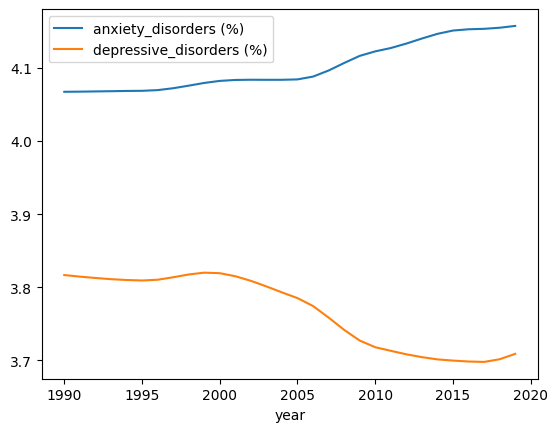

In [26]:
global_trends_by_years['anxiety_disorders'].plot() 
global_trends_by_years['depressive_disorders'].plot() 

plt.legend(['anxiety_disorders (%)', "depressive_disorders (%)"])

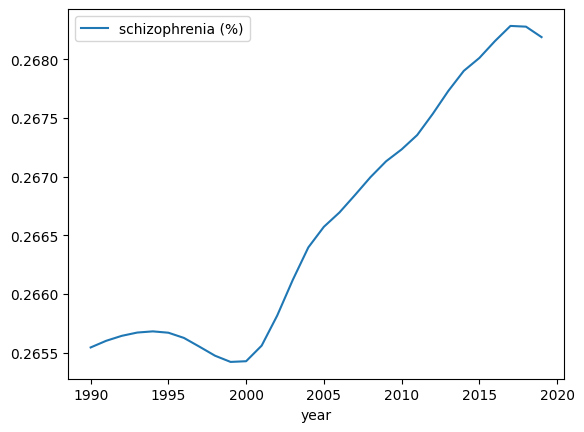

In [27]:
global_trends_by_years['schizophrenia'].plot() 

plt.legend(['schizophrenia (%)'])

In [28]:
global_trends_by_years['bipolar_disorders'].plot() 

plt.legend(['bipolar_disorders (%)'])

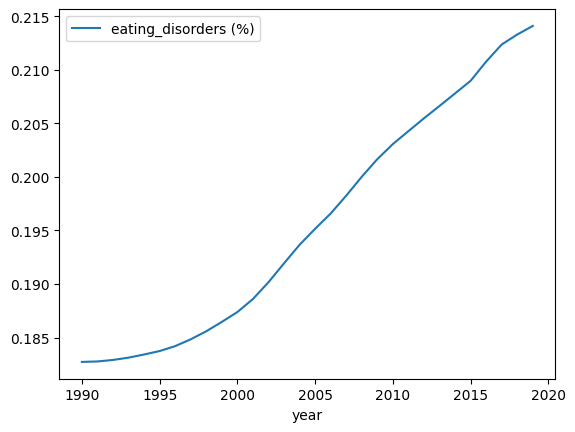

In [29]:
global_trends_by_years['eating_disorders'].plot() 

plt.legend(['eating_disorders (%)'])

### Let's see the picture by Countries

In [30]:
global_trends.head()

entity  year  schizophrenia  depressive_disorders  anxiety_disorders  \
0  Afghanistan  1990       0.223206              4.996118           4.713314   
1  Afghanistan  1991       0.222454              4.989290           4.702100   
2  Afghanistan  1992       0.221751              4.981346           4.683743   
3  Afghanistan  1993       0.220987              4.976958           4.673549   
4  Afghanistan  1994       0.220183              4.977782           4.670810   

   bipolar_disorders  eating_disorders      total  
0           0.703023          0.127700  10.763361  
1           0.702069          0.123256  10.739168  
2           0.700792          0.118844  10.706476  
3           0.700087          0.115089  10.686670  
4           0.699898          0.111815  10.680488

In [31]:
global_trends_by_entity=global_trends.groupby('entity')[illnesses+['total']].mean()

In [32]:
global_trends_by_entity.head()

schizophrenia  depressive_disorders  anxiety_disorders  \
entity                                                                       
Afghanistan              0.217139              4.968072           4.713665   
Africa (IHME GBD)        0.219843              4.557986           3.668081   
Albania                  0.283351              2.434626           3.734468   
Algeria                  0.249057              4.132249           4.664659   
America (IHME GBD)       0.341972              3.691891           5.489782   

                    bipolar_disorders  eating_disorders      total  
entity                                                              
Afghanistan                  0.699886          0.106869  10.705631  
Africa (IHME GBD)            0.605400          0.112780   9.164089  
Albania                      0.542134          0.113957   7.108537  
Algeria                      0.756328          0.195034   9.997327  
America (IHME GBD)           0.833155          0.299468  10.656268

In [33]:
def graph_by_column(column,figsize=(12, 8),dataset=global_trends_by_entity, top_number=30):
    """this helper function plots a graph of global_trends_by_entity first 30 entities

    Args:
        column (_type_): disorder type (namr of column)
        figsize (tuple, optional): Plot figure size. Defaults to (12, 8).
        dataset (DataFrame): dataset to use
        top_number (int): how many first entites to display
    """
    sorted_global_trends = dataset.sort_values(by=column, ascending=False)

    # Select the top_number entities
    top_30_entities = sorted_global_trends.head(top_number)

    # Plotting the bar graph
    plt.figure(figsize=figsize)
    top_30_entities[column].plot(kind='barh', color='orange')
    plt.title('Top countries by '+column)
    plt.ylabel('Country')
    plt.xlabel(column)
    plt.xticks(rotation=90)
    plt.gca().invert_yaxis()
    plt.show()

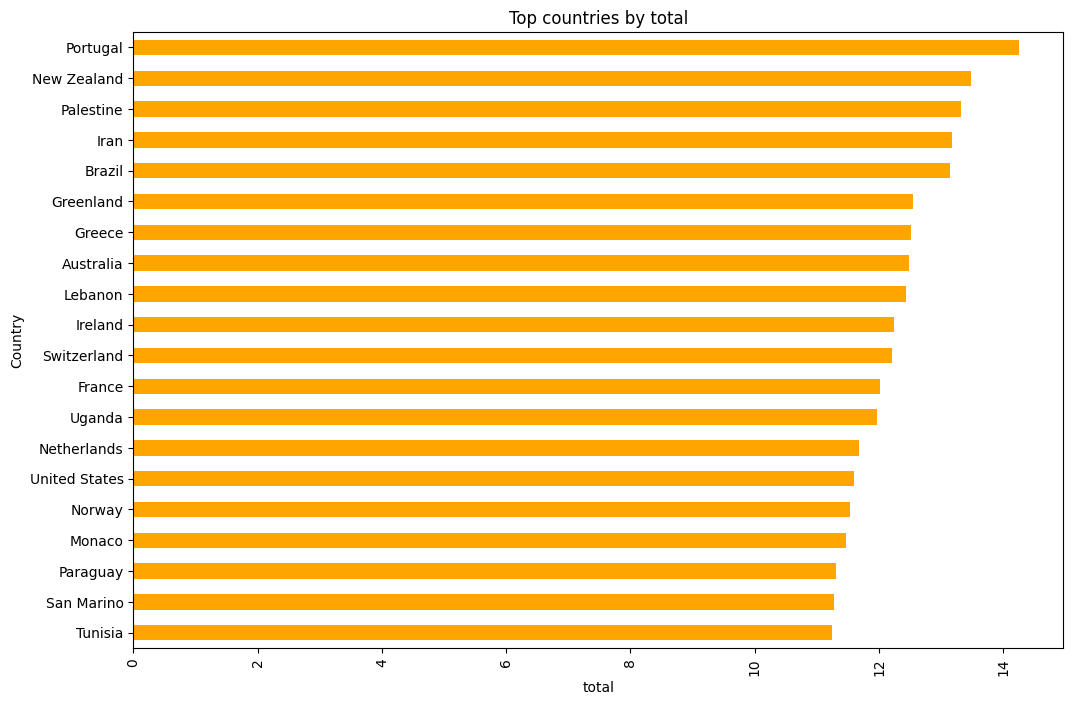

In [34]:
graph_by_column('total', top_number=20)

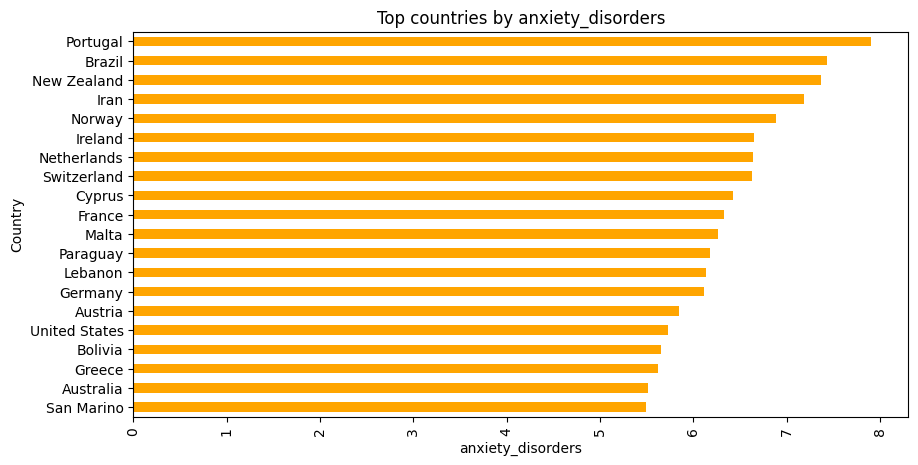

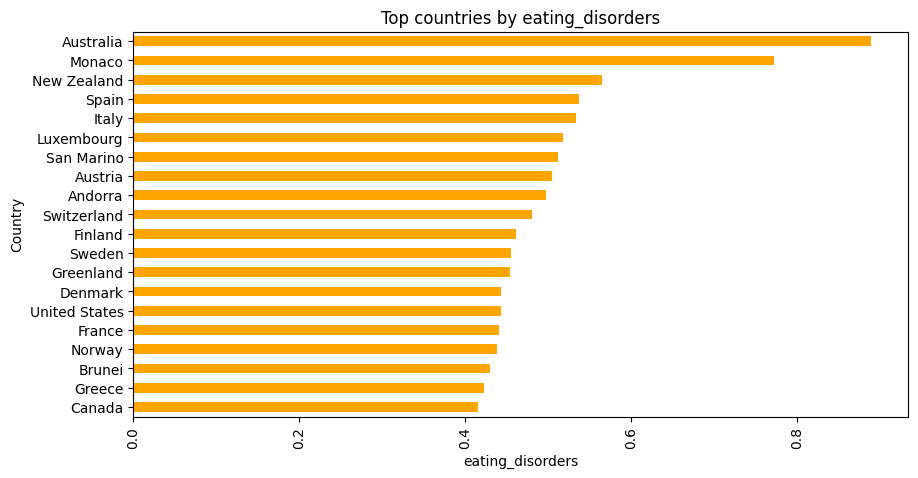

In [35]:
for illness in illnesses:
    graph_by_column(illness, figsize=(10,5), top_number=20)

In [36]:
global_trends_by_entity.head()

schizophrenia  depressive_disorders  anxiety_disorders  \
entity                                                                       
Afghanistan              0.217139              4.968072           4.713665   
Africa (IHME GBD)        0.219843              4.557986           3.668081   
Albania                  0.283351              2.434626           3.734468   
Algeria                  0.249057              4.132249           4.664659   
America (IHME GBD)       0.341972              3.691891           5.489782   

                    bipolar_disorders  eating_disorders      total  
entity                                                              
Afghanistan                  0.699886          0.106869  10.705631  
Africa (IHME GBD)            0.605400          0.112780   9.164089  
Albania                      0.542134          0.113957   7.108537  
Algeria                      0.756328          0.195034   9.997327  
America (IHME GBD)           0.833155          0.299468  10.656268

This dataset contains data for groups of countries.
let's extract them

In [37]:
# We have run the commented code below, and pick up names for country groups of 'entity' column

# all_entities=global_trends_by_entity.index
# [print(elem) for elem in list(all_entities)]

In [38]:
countries_groups=['Africa (IHME GBD)',
'America (IHME GBD)',
'Asia (IHME GBD)',
'Europe (IHME GBD)',
'European Union (27)',
'High-income countries',
'Low-income countries',
'Lower-middle-income countries',
'Upper-middle-income countries']


In [39]:
global_trends_by_entity.loc[countries_groups]

schizophrenia  depressive_disorders  \
entity                                                               
Africa (IHME GBD)                   0.219843              4.557986   
America (IHME GBD)                  0.341972              3.691891   
Asia (IHME GBD)                     0.290808              3.291311   
Europe (IHME GBD)                   0.276139              3.591513   
European Union (27)                 0.277650              3.619754   
High-income countries               0.330468              3.600706   
Low-income countries                0.216413              4.703680   
Lower-middle-income countries       0.273404              3.841559   
Upper-middle-income countries       0.290155              3.182751   

                               anxiety_disorders  bipolar_disorders  \
entity                                                                
Africa (IHME GBD)                       3.668081           0.605400   
America (IHME GBD)                      5.489782           0.833155   
Asia (IHME GBD)                         3.273699           0.328355   
Europe (IHME GBD)                       4.452671           0.731085   
European Union (27)                     5.050169           0.820387   
High-income countries                   4.844555           0.734885   
Low-income countries                    3.616271           0.545364   
Lower-middle-income countries           3.228444           0.416105   
Upper-middle-income countries           3.936043           0.431442   

                               eating_disorders      total  
entity                                                      
Africa (IHME GBD)                      0.112780   9.164089  
America (IHME GBD)                     0.299468  10.656268  
Asia (IHME GBD)                        0.113428   7.297602  
Europe (IHME GBD)                      0.289615   9.341024  
European Union (27)                    0.377035  10.144995  
High-income countries                  0.397916   9.908530  
Low-income countries                   0.081541   9.163268  
Lower-middle-income countries          0.104817   7.864329  
Upper-middle-income countries          0.131808   7.972198

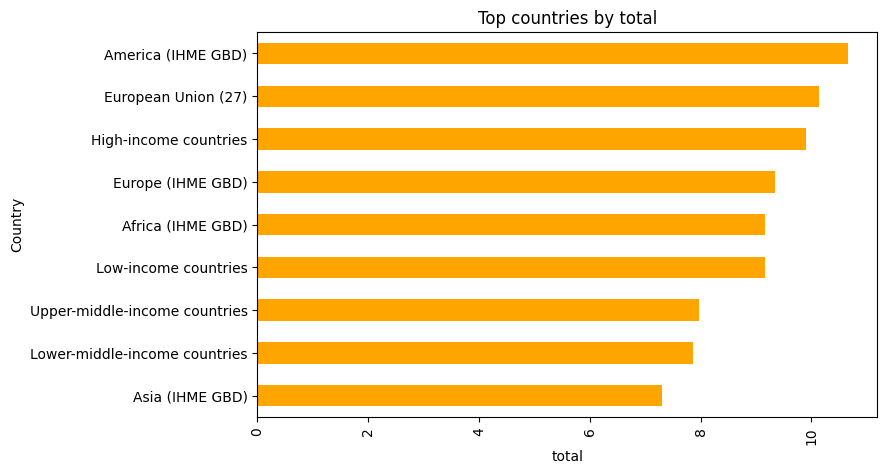

In [40]:
graph_by_column('total',figsize=(8,5),dataset=global_trends_by_entity.loc[countries_groups])

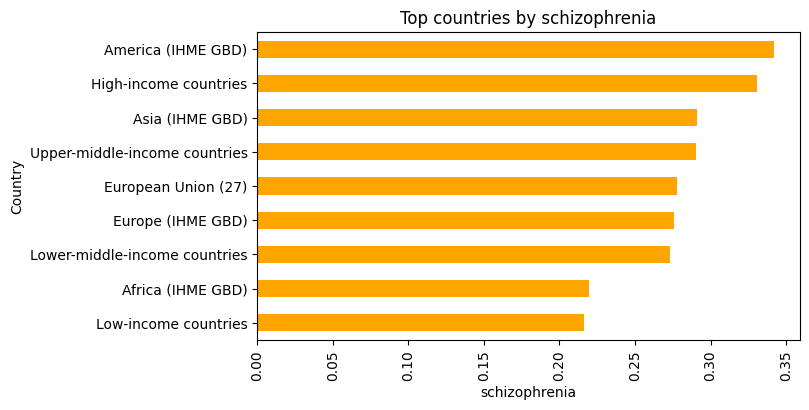

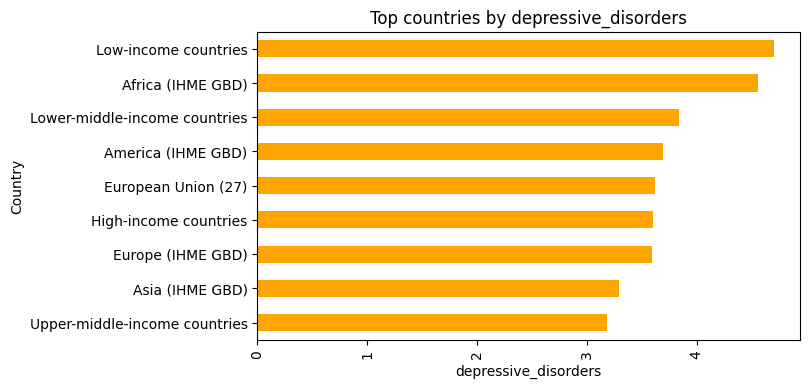

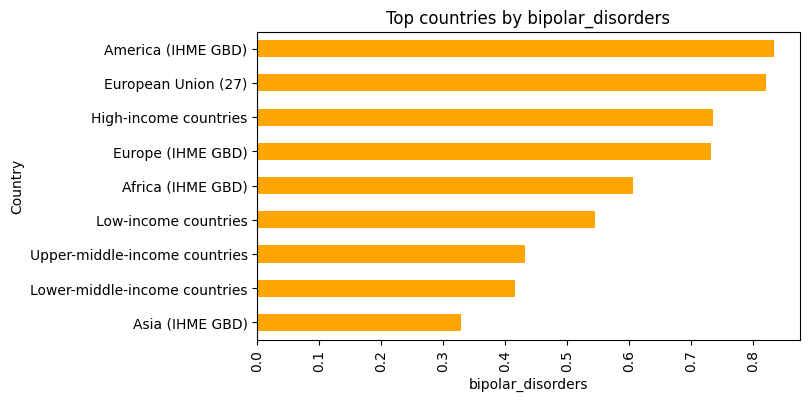

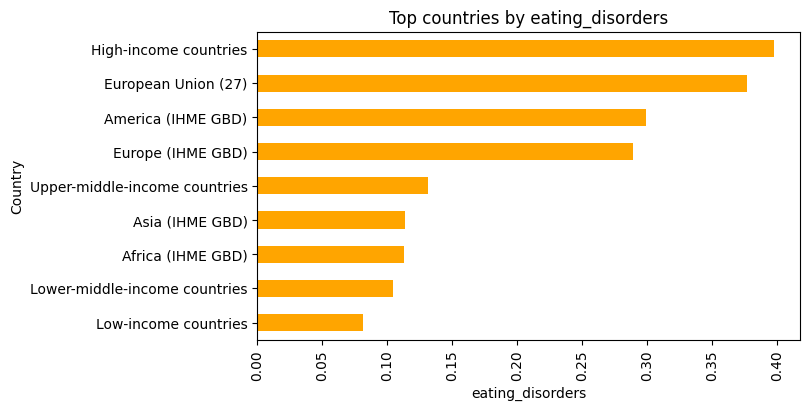

In [41]:
for illness in illnesses:
    graph_by_column(illness,figsize=(7,4),dataset=global_trends_by_entity.loc[countries_groups])

## Adding social network data


We have a data on revenue and active users per month and per day on this social media platforms:

[Facebook](https://www.businessofapps.com/data/facebook-statistics/)
[Twitter](https://www.businessofapps.com/data/twitter-statistics/)
[Instagram](https://www.businessofapps.com/data/instagram-statistics/)

The data we need is only monthly active users in respect for years. 
This site offers pay download of charts with quaternary data, but since we have our mental health dataset with year granularity, 
we will be good with yearly granularity, which can be just copied from the site.
Small helper function for formatting is needed. But there is no parser, so to get the data again you will need to copy it to this notebook.


In [42]:
def data_from_big_string_to_dict(copied_data:str)->dict[str:int]:
    """this function convert data in copied_data string into dict
    copied_data: contains data like "2004  445" where first is string key, and 445 is numerical data we need
    
    return -> dict with first string in line as keys, and second - as numeral value to this key.
    """
    result={}
    for dataline in copied_data.strip().split('\n'):
        try:
            linekey,linevalue=dataline.strip().split()[0],dataline.split()[-1]
            linevalue=int(linevalue)
            if linevalue!=float(linevalue):
                linevalue=float(linevalue)
            if linekey:
                result[linekey]=linevalue
        except ValueError:
            pass
    return result

In [43]:
# social network data extracted from specified sites

facebook_users_str="""
2008	100
2009	242
2010	482
2011	739
2012	955
2013	1155
2014	1310
2015	1490
2016	1710
2017	2000
2018	2230
2019	2410
2020	2700
2021	2910
2022	2933
2023	3033
"""
twitter_users_str="""
2010	40
2011	85
2012	151
2013	218
2014	271
2015	304
2016	313
2017	310
2018	298
2019	312
2020	347
2021	362
2022	401
2023	421
"""

instagram_users_str="""
2013	110
2014	200
2015	370
2016	500
2017	700
2018	1000
2019	1210
2020	1520
2021	1890
2022	2270
2023	2385
"""

facebook_users=data_from_big_string_to_dict(facebook_users_str)
twitter_users=data_from_big_string_to_dict(twitter_users_str)
instagram_users=data_from_big_string_to_dict(instagram_users_str)

In [44]:
print(facebook_users,twitter_users,instagram_users)

{'2008': 100, '2009': 242, '2010': 482, '2011': 739, '2012': 955, '2013': 1155, '2014': 1310, '2015': 1490, '2016': 1710, '2017': 2000, '2018': 2230, '2019': 2410, '2020': 2700, '2021': 2910, '2022': 2933, '2023': 3033} {'2010': 40, '2011': 85, '2012': 151, '2013': 218, '2014': 271, '2015': 304, '2016': 313, '2017': 310, '2018': 298, '2019': 312, '2020': 347, '2021': 362, '2022': 401, '2023': 421} {'2013': 110, '2014': 200, '2015': 370, '2016': 500, '2017': 700, '2018': 1000, '2019': 1210, '2020': 1520, '2021': 1890, '2022': 2270, '2023': 2385}


### Global population

since we have a mental illnesses data in percentage it would be wise to get the percentage of social media users, so we will need data on Earth population

This page has the data we need: [Wikipedia World Population](https://en.wikipedia.org/wiki/World_population#:~:text=In%20world%20demographics%2C%20the%20world,billion%20in%20mid%2DNovember%202022.)


In [45]:
world_population_str="""
1990	5,316,175,862	
1991	5,406,245,867	
1992	5,492,686,093	
1993	5,577,433,523	
1994	5,660,727,993	
1995	5,743,219,454	
1996	5,825,145,298	
1997	5,906,481,261	
1998	5,987,312,480	
1999	6,067,758,458	
2000	6,148,898,975	
2001	6,230,746,982	
2002	6,312,407,360
2003	6,393,898,365	
2004	6,475,751,478	
2005	6,558,176,119	
2006	6,641,416,218	
2007	6,725,948,544	
2008	6,811,597,272	
2009	6,898,305,908	
2010	6,985,603,105	
2011	7,073,125,425	
2012	7,161,697,921	
2013	7,250,593,370	
2014	7,339,013,419	
2015	7,426,597,537	
2016	7,513,474,238	
2017	7,599,822,404	
2018	7,683,789,828	
2019	7,764,951,032	
2020	7,840,952,880	
2021	7,909,295,151	
2022	7,975,105,156	
2023	8,045,311,447	
"""

world_population=data_from_big_string_to_dict(world_population_str.replace(',',''))

In [46]:
print(world_population)

{'1990': 5316175862, '1991': 5406245867, '1992': 5492686093, '1993': 5577433523, '1994': 5660727993, '1995': 5743219454, '1996': 5825145298, '1997': 5906481261, '1998': 5987312480, '1999': 6067758458, '2000': 6148898975, '2001': 6230746982, '2002': 6312407360, '2003': 6393898365, '2004': 6475751478, '2005': 6558176119, '2006': 6641416218, '2007': 6725948544, '2008': 6811597272, '2009': 6898305908, '2010': 6985603105, '2011': 7073125425, '2012': 7161697921, '2013': 7250593370, '2014': 7339013419, '2015': 7426597537, '2016': 7513474238, '2017': 7599822404, '2018': 7683789828, '2019': 7764951032, '2020': 7840952880, '2021': 7909295151, '2022': 7975105156, '2023': 8045311447}



### social_media_usage dataframe

Let's make DataFrame for social media usage

In [48]:
social_media_usage=pd.DataFrame(columns=['year','population','facebook_users','facebook_percentage','twitter_users','twitter_percentage','instagram_users','instagram_percentage'])
social_media_usage.set_index('year')

Empty DataFrame
Columns: [population, facebook_users, facebook_percentage, twitter_users, twitter_percentage, instagram_users, instagram_percentage]
Index: []

In [49]:
for year in world_population:
    population=round(world_population[year]/1e6,2)
    social_media_usage.loc[year]={
                  'year':year,
                  'population':population,
                  'facebook_users':facebook_users.get(year,0),
                  'facebook_percentage':round(facebook_users.get(year,0)/population*100,4),
                  'twitter_users':twitter_users.get(year,0),
                  'twitter_percentage':round(twitter_users.get(year,0)/population*100,4),
                  'instagram_users':instagram_users.get(year,0),
                  'instagram_percentage':round(instagram_users.get(year,0)/population*100,4),
                }
    

In [50]:
social_media_usage

year  population  facebook_users  facebook_percentage  twitter_users  \
1990  1990     5316.18               0               0.0000              0   
1991  1991     5406.25               0               0.0000              0   
1992  1992     5492.69               0               0.0000              0   
1993  1993     5577.43               0               0.0000              0   
1994  1994     5660.73               0               0.0000              0   
1995  1995     5743.22               0               0.0000              0   
1996  1996     5825.15               0               0.0000              0   
1997  1997     5906.48               0               0.0000              0   
1998  1998     5987.31               0               0.0000              0   
1999  1999     6067.76               0               0.0000              0   
2000  2000     6148.90               0               0.0000              0   
2001  2001     6230.75               0               0.0000              0   
2002  2002     6312.41               0               0.0000              0   
2003  2003     6393.90               0               0.0000              0   
2004  2004     6475.75               0               0.0000              0   
2005  2005     6558.18               0               0.0000              0   
2006  2006     6641.42               0               0.0000              0   
2007  2007     6725.95               0               0.0000              0   
2008  2008     6811.60             100               1.4681              0   
2009  2009     6898.31             242               3.5081              0   
2010  2010     6985.60             482               6.8999             40   
2011  2011     7073.13             739              10.4480             85   
2012  2012     7161.70             955              13.3348            151   
2013  2013     7250.59            1155              15.9297            218   
2014  2014     7339.01            1310              17.8498            271   
2015  2015     7426.60            1490              20.0630            304   
2016  2016     7513.47            1710              22.7591            313   
2017  2017     7599.82            2000              26.3164            310   
2018  2018     7683.79            2230              29.0221            298   
2019  2019     7764.95            2410              31.0369            312   
2020  2020     7840.95            2700              34.4346            347   
2021  2021     7909.30            2910              36.7921            362   
2022  2022     7975.11            2933              36.7769            401   
2023  2023     8045.31            3033              37.6990            421   

      twitter_percentage  instagram_users  instagram_percentage  
1990              0.0000                0                0.0000  
1991              0.0000                0                0.0000  
1992              0.0000                0                0.0000  
1993              0.0000                0                0.0000  
1994              0.0000                0                0.0000  
1995              0.0000                0                0.0000  
1996              0.0000                0                0.0000  
1997              0.0000                0                0.0000  
1998              0.0000                0                0.0000  
1999              0.0000                0                0.0000  
2000              0.0000                0                0.0000  
2001              0.0000                0                0.0000  
2002              0.0000                0                0.0000  
2003              0.0000                0                0.0000  
2004              0.0000                0                0.0000  
2005              0.0000                0                0.0000  
2006              0.0000                0                0.0000  
2007              0.0000                0                0.0000  
2008              0.0

In [52]:
SOCIAL_MEDIA_USAGE_FILENAME='social_media_usage_by_years/social_media_usage.csv'

social_media_usage.to_csv(SOCIAL_MEDIA_USAGE_FILENAME)

# Save for usability, maybe we will need it 


In [55]:
global_trends[global_trends['entity'].isin(countries_groups)].head()

entity  year  schizophrenia  depressive_disorders  \
30  Africa (IHME GBD)  1990       0.219527              4.602806   
31  Africa (IHME GBD)  1991       0.219559              4.598041   
32  Africa (IHME GBD)  1992       0.219579              4.593013   
33  Africa (IHME GBD)  1993       0.219583              4.588568   
34  Africa (IHME GBD)  1994       0.219556              4.586263   

    anxiety_disorders  bipolar_disorders  eating_disorders     total  
30           3.696839           0.607027          0.111027  9.237227  
31           3.695416           0.607090          0.110425  9.230530  
32           3.693819           0.607127          0.109845  9.223383  
33           3.692097           0.607134          0.109305  9.216687  
34           3.690115           0.607082          0.108813  9.211828

### Let's make a graph with combined data

In [56]:
countries_groups

['Africa (IHME GBD)',
 'America (IHME GBD)',
 'Asia (IHME GBD)',
 'Europe (IHME GBD)',
 'European Union (27)',
 'High-income countries',
 'Low-income countries',
 'Lower-middle-income countries',
 'Upper-middle-income countries']

Let's  draw a sample plot, and we will reuse this code later in a function

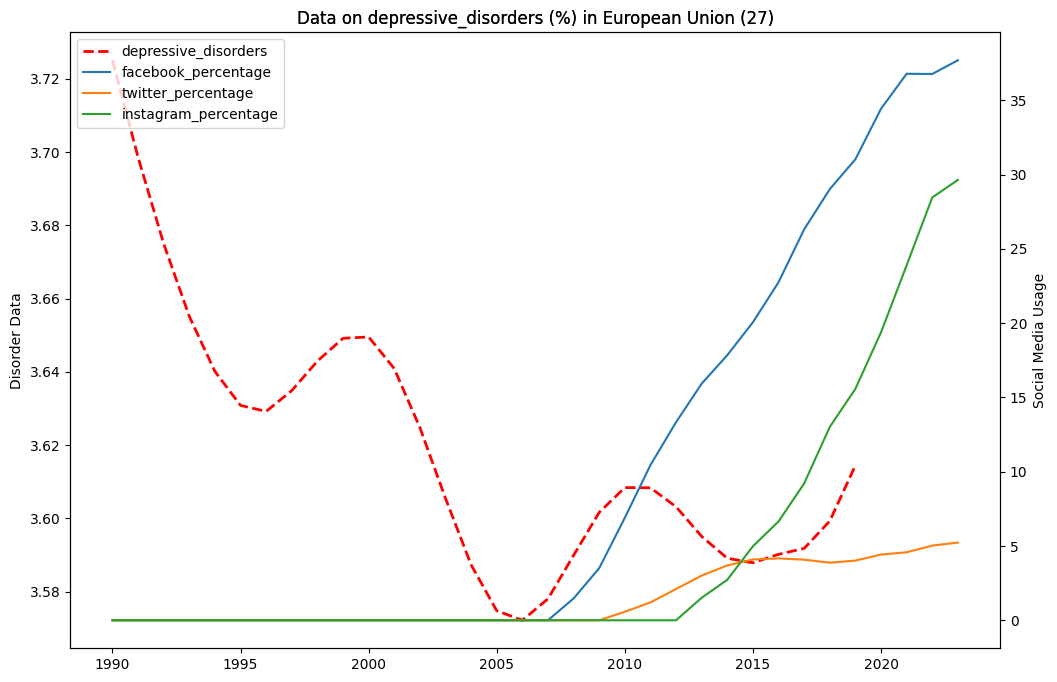

In [57]:
select_country='European Union (27)'
select_illness='depressive_disorders'
use_social_media_data=['facebook_percentage','twitter_percentage','instagram_percentage']
figsize=(12, 8)

dataset_to_use=global_trends

mental_health_selected_data=dataset_to_use[global_trends['entity']==select_country]

mental_health_selected_data.reset_index(drop=True, inplace=True)

mental_health_selected_data.set_index('year')

illness_title=select_illness+' (%)'
graph_title='Data on '+select_illness+' (%) in '+select_country

fig, ax1 = plt.subplots(figsize=figsize)

ax1 = plt.gca()
mental_health_selected_data[select_illness].plot(ax=ax1,title=graph_title, color='red',linestyle='--', linewidth=2)
# ax1.title('')
ax1.set_ylabel('Disorder Data')


ax2 = ax1.twinx()
for social_media_info in use_social_media_data:
    social_media_usage[social_media_info].plot(ax=ax2,title=social_media_info)
# ax2.title('')
ax2.set_ylabel('Social Media Usage')
    
    
plt.title(graph_title)
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2,loc='best')
plt.show()


## Now lets add social usage to global data by years



### Important note! 
*There is entities with country groups. Les't subtract them from aggregation by years, so we will aggregate on all single countries.*

In [58]:
social_media_usage.head()

year  population  facebook_users  facebook_percentage  twitter_users  \
1990  1990     5316.18               0                  0.0              0   
1991  1991     5406.25               0                  0.0              0   
1992  1992     5492.69               0                  0.0              0   
1993  1993     5577.43               0                  0.0              0   
1994  1994     5660.73               0                  0.0              0   

      twitter_percentage  instagram_users  instagram_percentage  
1990                 0.0                0                   0.0  
1991                 0.0                0                   0.0  
1992                 0.0                0                   0.0  
1993                 0.0                0                   0.0  
1994                 0.0                0                   0.0

We will make a helper function for graphing


In [59]:
def plot_with_social_from_global(illness_list,rows=2, cols=3,use_social_media_data=['facebook_percentage','twitter_percentage','instagram_percentage'],
                                 figsize=(12, 8),dataset_to_use=global_trends_by_years,
                                 social_media_usage_ds=social_media_usage, legend_alpha=0.7):
    """Plot disorders in illness_lists along with social media users by years of given dataset

    Args:
        illness_list (list): list of Illness we display
        rows, cols (int): the grid dimensions
        use_social_media_data (list, optional): _description_. What social media data we use
        figsize (tuple, optional): _description_. Defaults to (12, 8). Our plot size
        dataset_to_use (_type_, optional): _description_. Defaults to global_trends_by_years. Trends of mental health DS
        social_media_usage_ds: Defaults to social_media_usage. Social media DS
        legend_alpha(float): legend transparency
    """
    
    def draw_subplot(ax1,select_illness):
        """Helper function draw subplot in selected ax

        Args:
            ax1 (_type_): place in grid
            select_illness (_type_): disorder to plot
        """
        
        illness_title=select_illness+' (% to population)'
        
        graph_title='Data on '+select_illness+' globally over the world (%)'
        mental_health_selected_data[select_illness].plot(ax=ax1,title=graph_title, color='red',linestyle='--', linewidth=2)
        ax1.set_ylabel(illness_title)
        
        ax2 = ax1.twinx()
        for social_media_info in use_social_media_data:
            social_media_usage_ds[social_media_info].plot(ax=ax2,title=social_media_info)
        ax2.set_ylabel('Social Media Usage (% to world population)')
            
        plt.title(graph_title)
        lines, labels = ax1.get_legend_handles_labels()
        lines2, labels2 = ax2.get_legend_handles_labels()
        legend=ax2.legend(lines + lines2, labels + labels2,loc='best')
        legend.get_frame().set_alpha(legend_alpha)
        for text in legend.get_texts():
            text.set_alpha(legend_alpha)



    mental_health_selected_data=dataset_to_use.copy()
    
    mental_health_selected_data.reset_index(inplace=True)

    mental_health_selected_data.set_index('year')


    fig, axs = plt.subplots(rows, cols, figsize=figsize)
    

    
    # we make an inner loop for making grid of plots:
    for i, illness in enumerate(illness_list):
        if len(illness_list) == 1:
            
            # in case there we are drawing only one plot:
            ax = axs
        else:
            
            # Calculate the row and column index for the current subplot
            row = i // cols
            col = i % cols


            # Get the corresponding axis for the subplot
            ax = axs[row, col]
            
            
        draw_subplot(ax,illness)
    
    plt.tight_layout()
    plt.show()



In [60]:
global_trends_by_years_without_country_groups=global_trends[~global_trends['entity'].isin(countries_groups)]

global_trends_by_years_without_country_groups=global_trends_by_years_without_country_groups.groupby('year')[illnesses+['total']].mean()

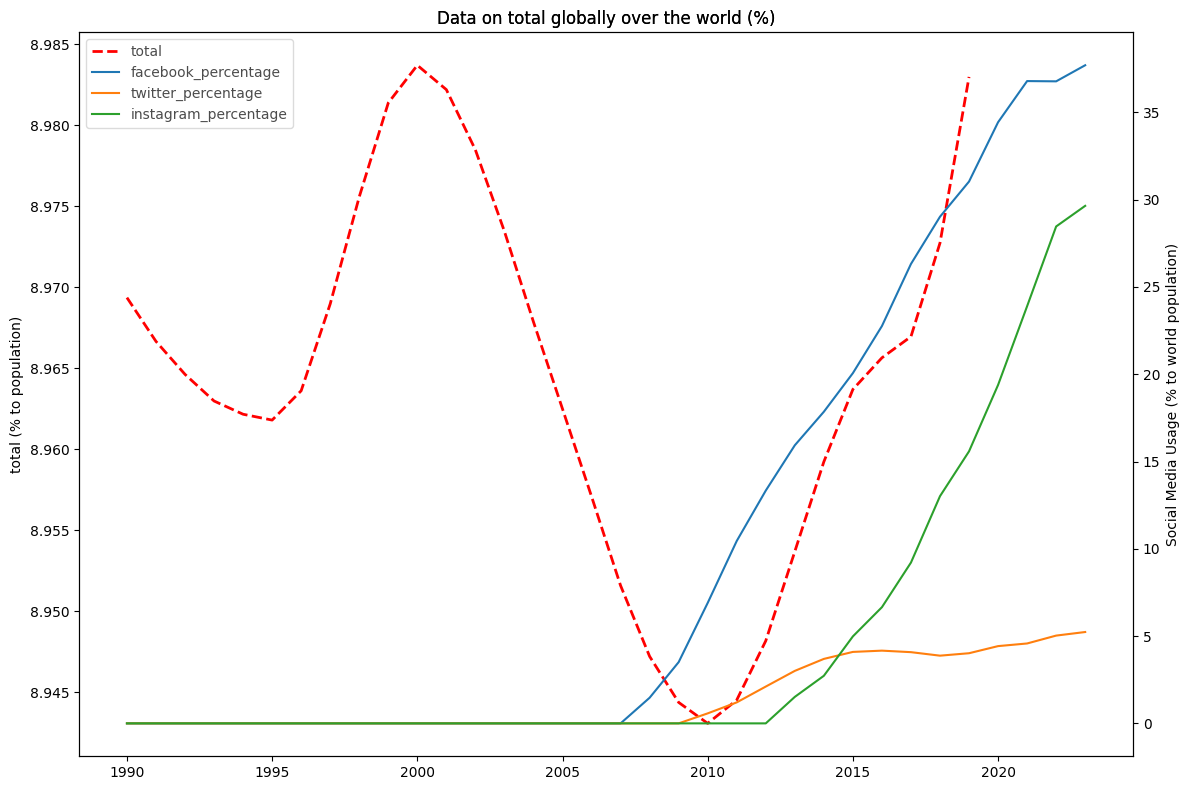

In [61]:
plot_with_social_from_global(['total'],cols=1,rows=1,dataset_to_use=global_trends_by_years_without_country_groups, figsize=(12,8))

### Let's see plot for every disorder

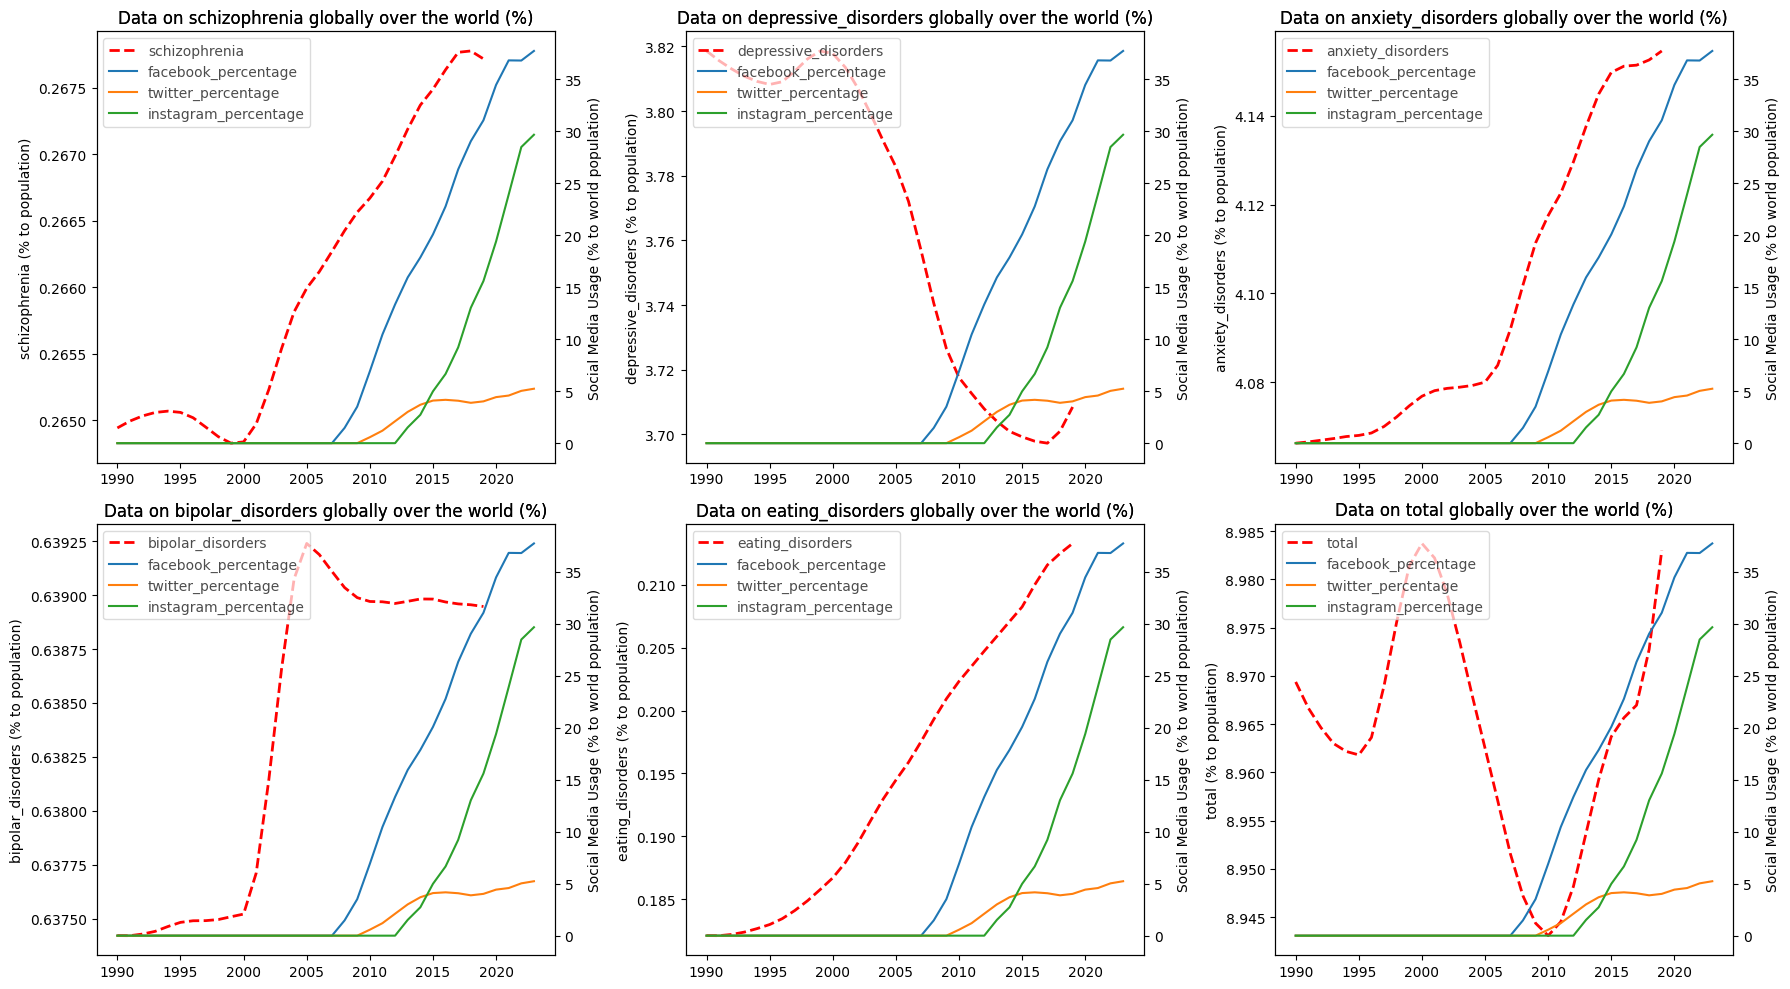

In [62]:
plot_with_social_from_global(illnesses+['total'],dataset_to_use=global_trends_by_years_without_country_groups, figsize=(18,10))

## Now let's explore plots for country groups

First a helper plot function

In [63]:
def plot_with_social_for_country(select_country,illness_list,rows=2, cols=3,use_social_media_data=['facebook_percentage','twitter_percentage','instagram_percentage'],
                                 figsize=(22, 12),dataset_to_use=global_trends,
                                 social_media_usage_ds=social_media_usage, legend_alpha=0.7):
    """Plot disorders in illness_lists along with social media users by years of given dataset

    Args:
        select_country: country group
        illness_list (list): list of illness we display
        rows, cols (int): the grid dimensions
        use_social_media_data (list, optional): _description_. What social media data we use
        figsize (tuple, optional): _description_. Defaults to (12, 8). Our plot size
        dataset_to_use (_type_, optional): _description_. Defaults to global_trends. Trends ds
        social_media_usage_ds: Defaults to social_media_usage. Social media DS
        legend_alpha(float): legend transparency
    """
    
    def draw_subplot(ax1,select_illness):
        """Helper function draw subplot in selected ax

        Args:
            ax1 (_type_): place in grid
            select_illness (_type_): disorder to plot
        """
        
        illness_title=select_illness+' (% to population)'
        graph_title='Data on '+select_illness+' (%) in '+select_country

        mental_health_selected_data[select_illness].plot(ax=ax1,title=graph_title, color='red',linestyle='--', linewidth=2)
        ax1.set_ylabel(illness_title)


        ax2 = ax1.twinx()
        for social_media_info in use_social_media_data:
            social_media_usage_ds[social_media_info].plot(ax=ax2,title=social_media_info)
        ax2.set_ylabel('Social Media Usage (% to world population)')
            
        plt.title(graph_title)
        lines, labels = ax1.get_legend_handles_labels()
        lines2, labels2 = ax2.get_legend_handles_labels()
        legend=ax2.legend(lines + lines2, labels + labels2,loc='best')
        legend.get_frame().set_alpha(legend_alpha)
        for text in legend.get_texts():
            text.set_alpha(legend_alpha)


    mental_health_selected_data=dataset_to_use[global_trends['entity']==select_country]
    
    mental_health_selected_data.reset_index(drop=True, inplace=True)

    mental_health_selected_data.set_index('year')

    fig, axs = plt.subplots(rows, cols, figsize=figsize)
    
    # we make an inner loop for making grid of plots,
    # each plot for each item in illness_list:
    
    for i, illness in enumerate(illness_list):
        row = i // cols
        col = i % cols
        ax = axs[row, col]
        draw_subplot(ax,illness)
    
    plt.tight_layout()
    plt.show()
    

### Plots for continents

In [64]:
continets=['Africa (IHME GBD)',
 'America (IHME GBD)',
 'Asia (IHME GBD)',
 'Europe (IHME GBD)',
 'European Union (27)']

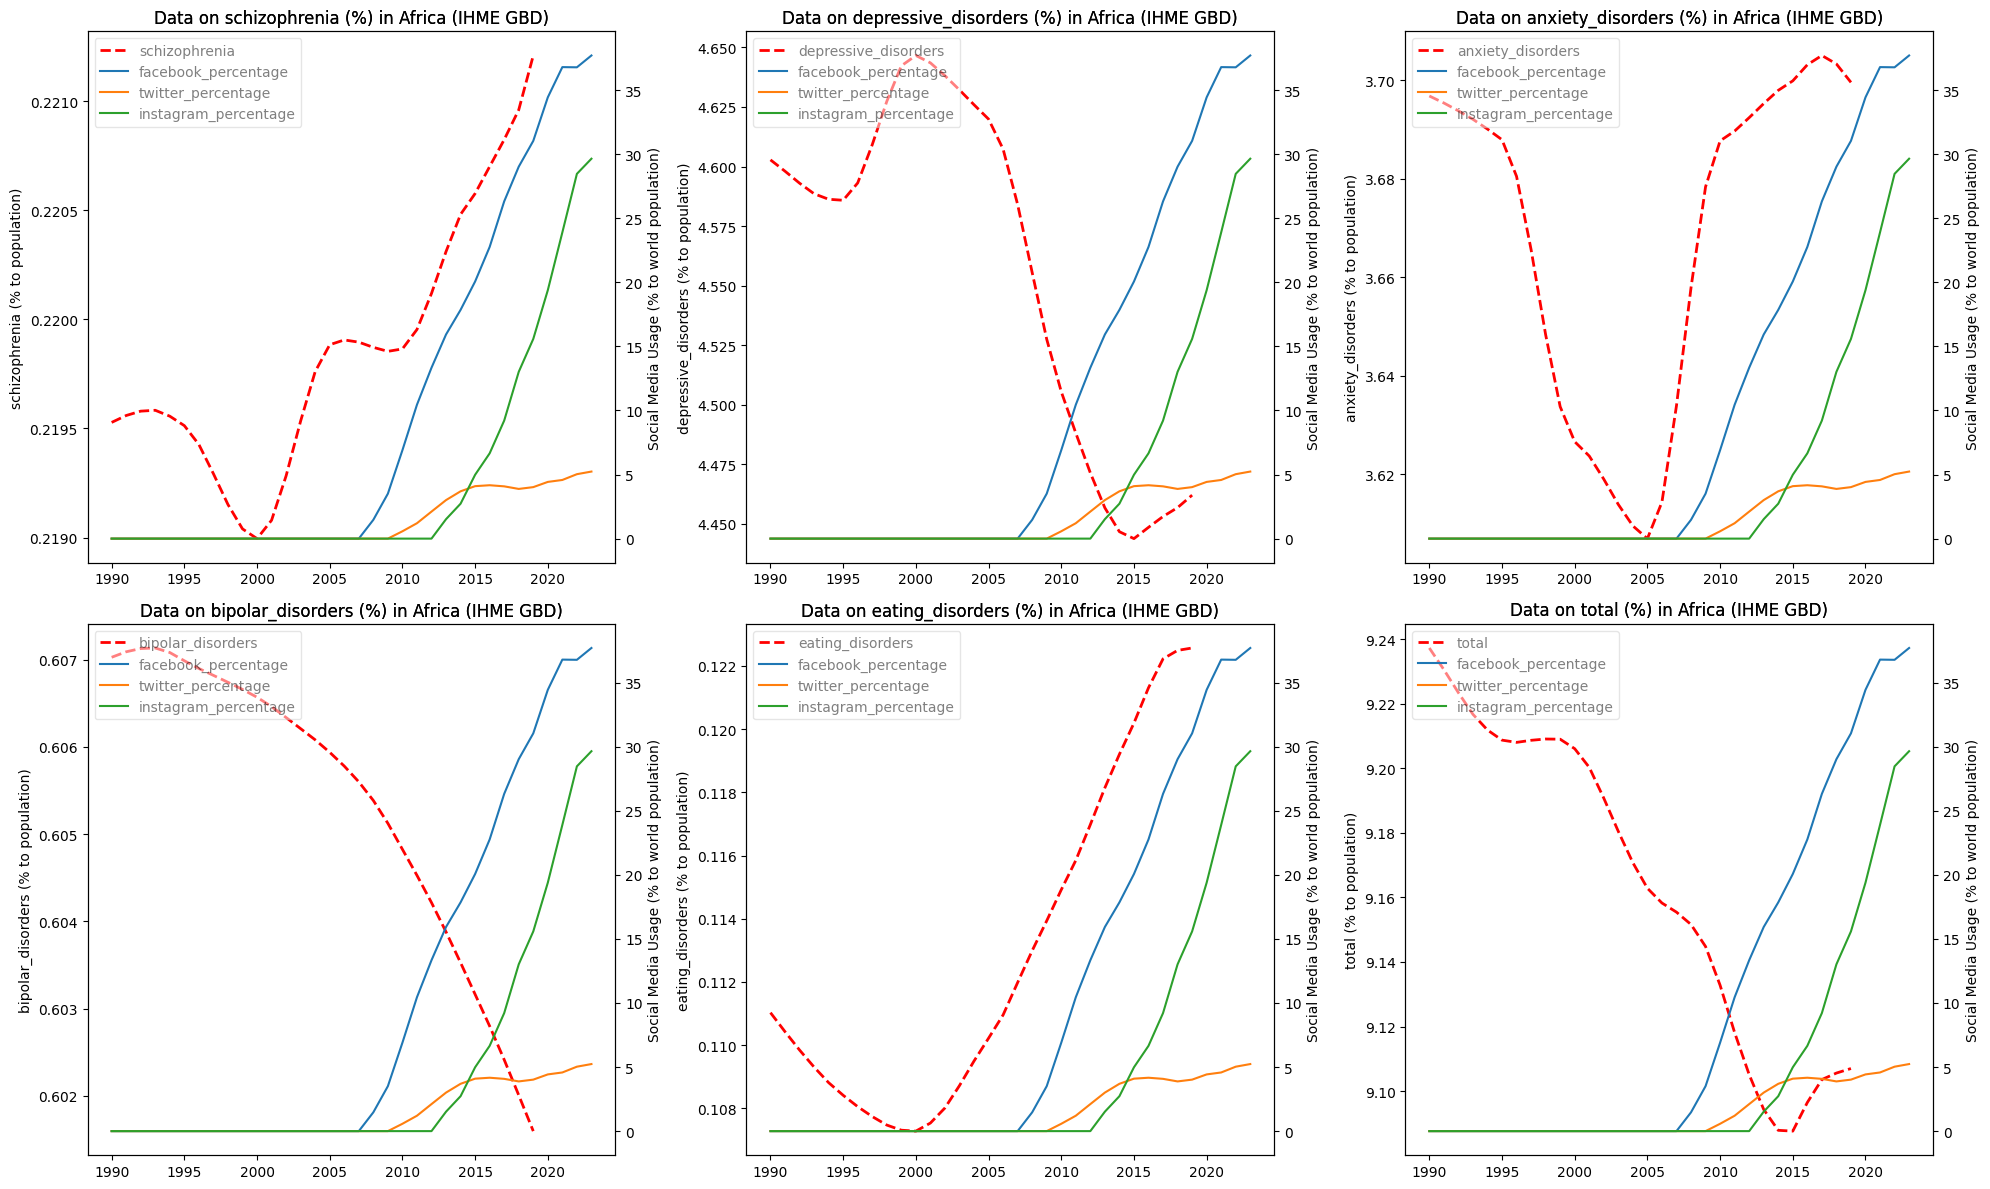

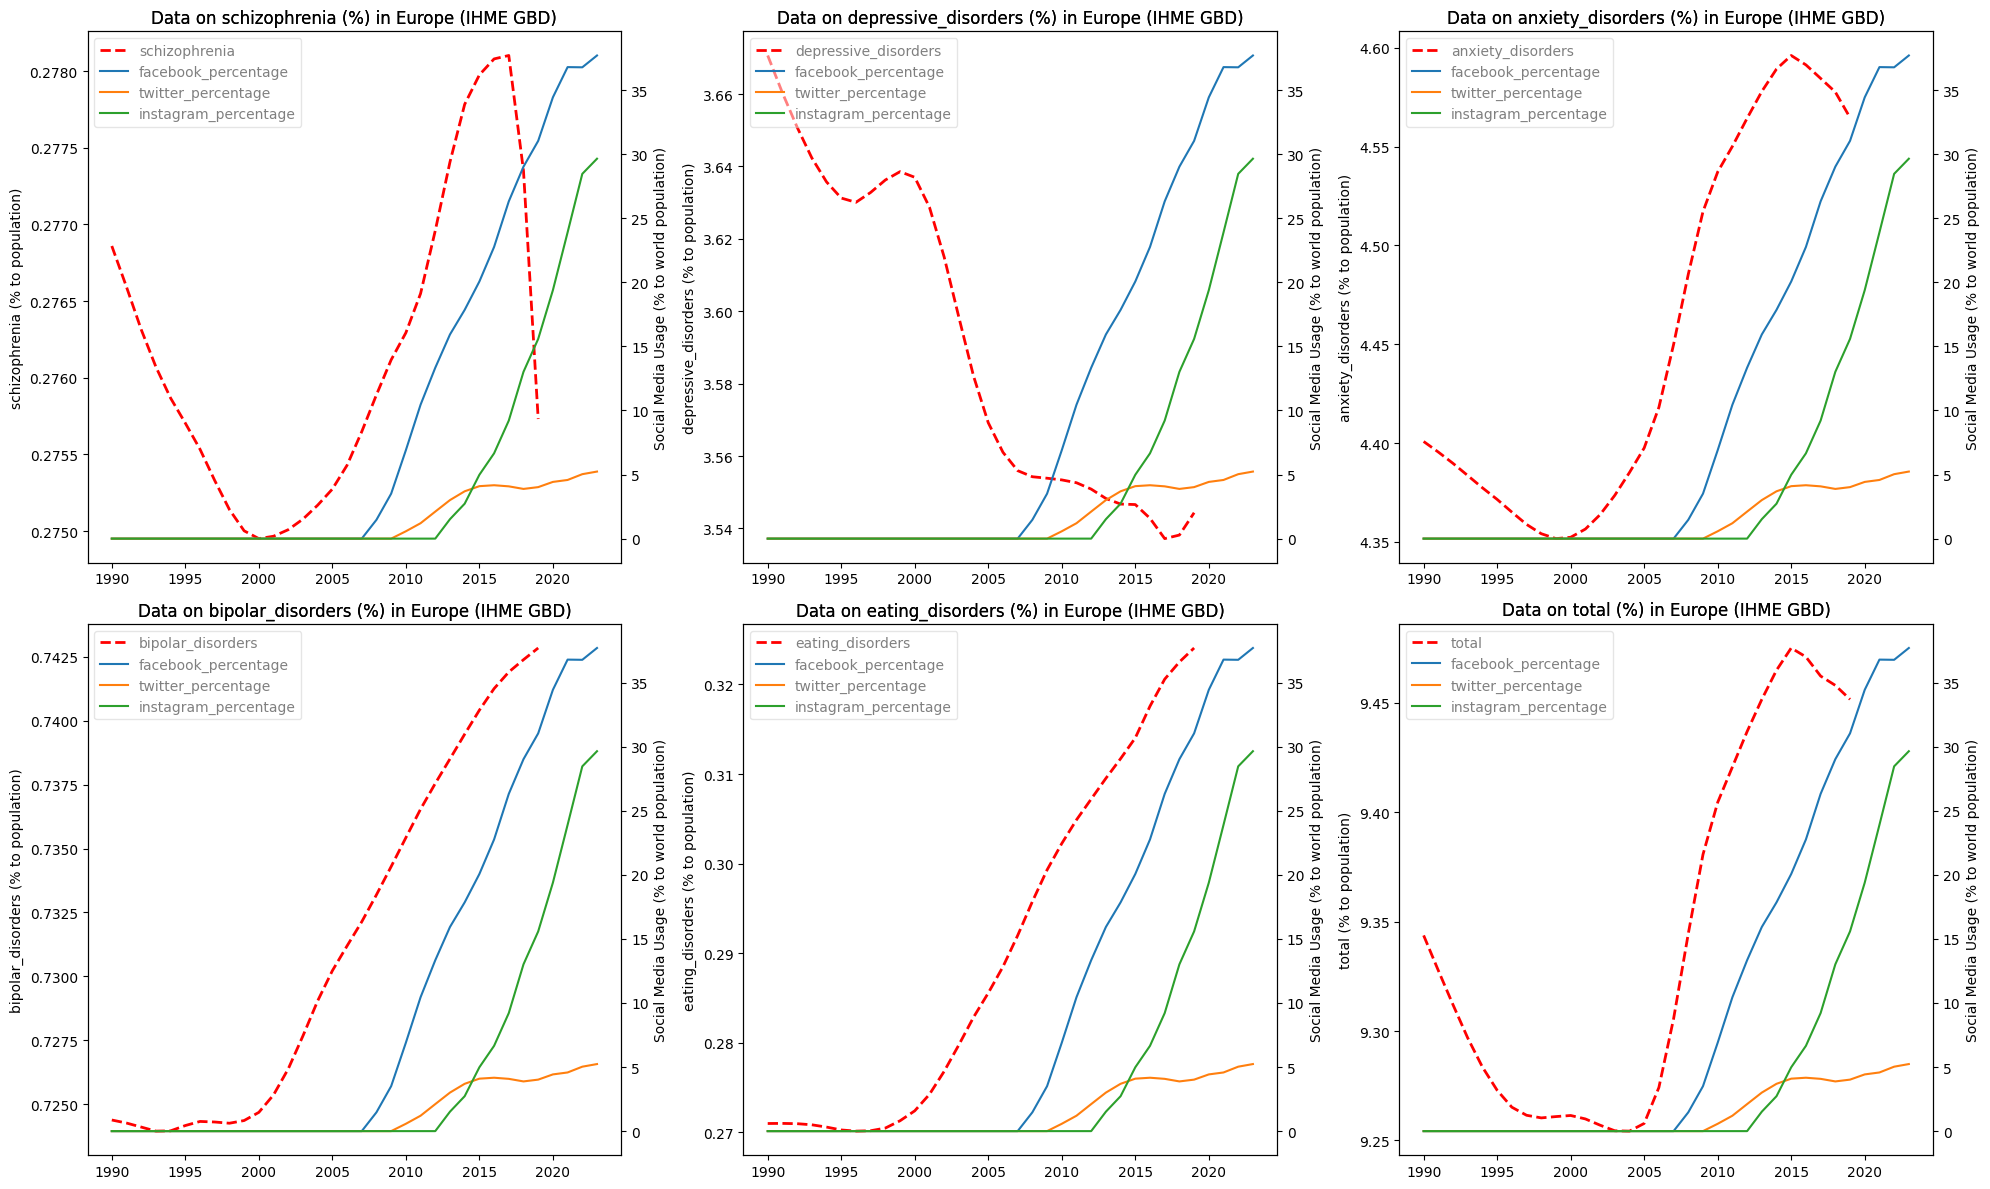

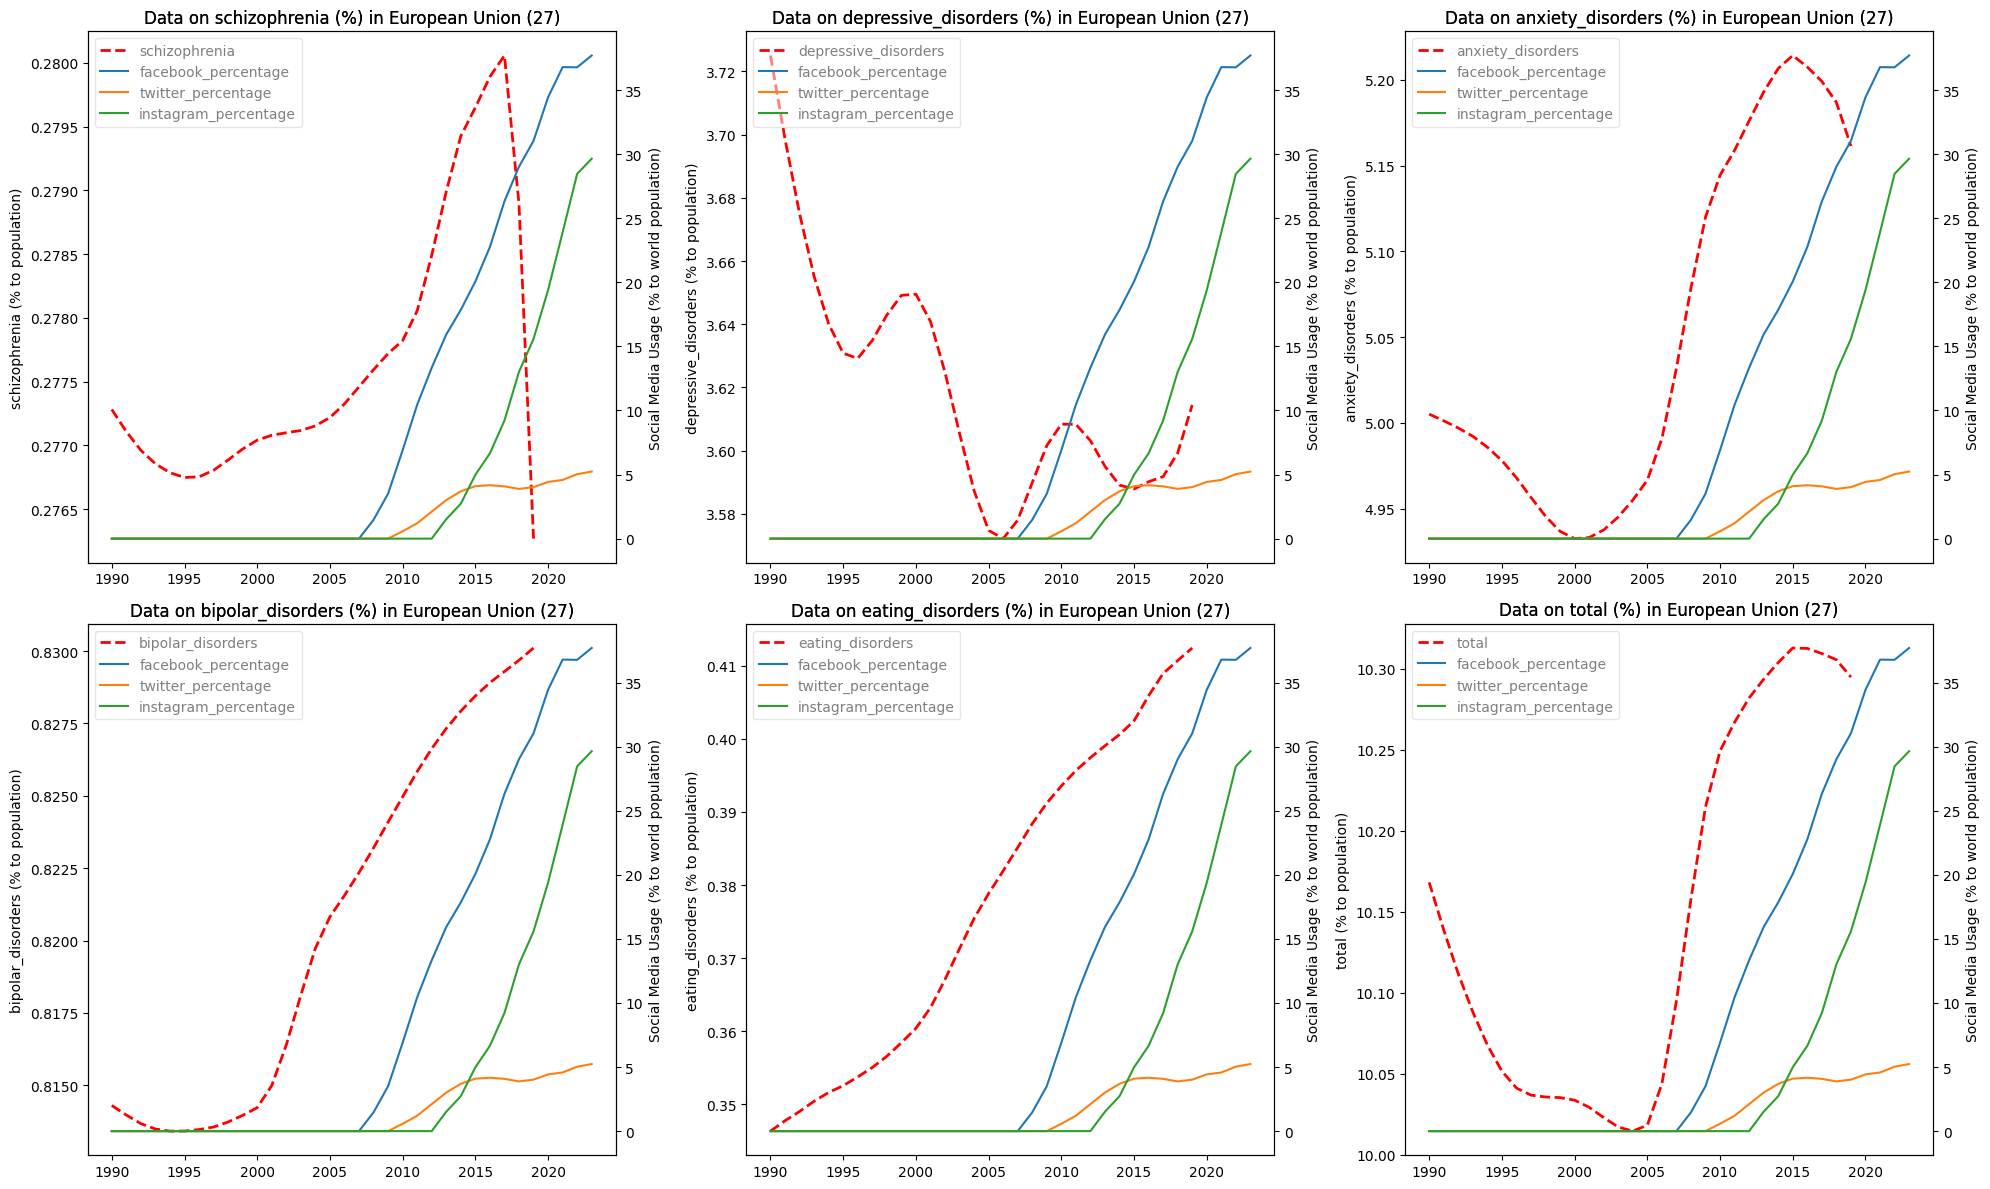

In [65]:
for country_group in continets:
    plot_with_social_for_country(country_group, illnesses+['total'],figsize=(20,12),legend_alpha=0.5)

### Plots for countries groups by income

In [66]:
 country_income_groups=['Low-income countries',
 'Lower-middle-income countries',
 'Upper-middle-income countries',
 'High-income countries']

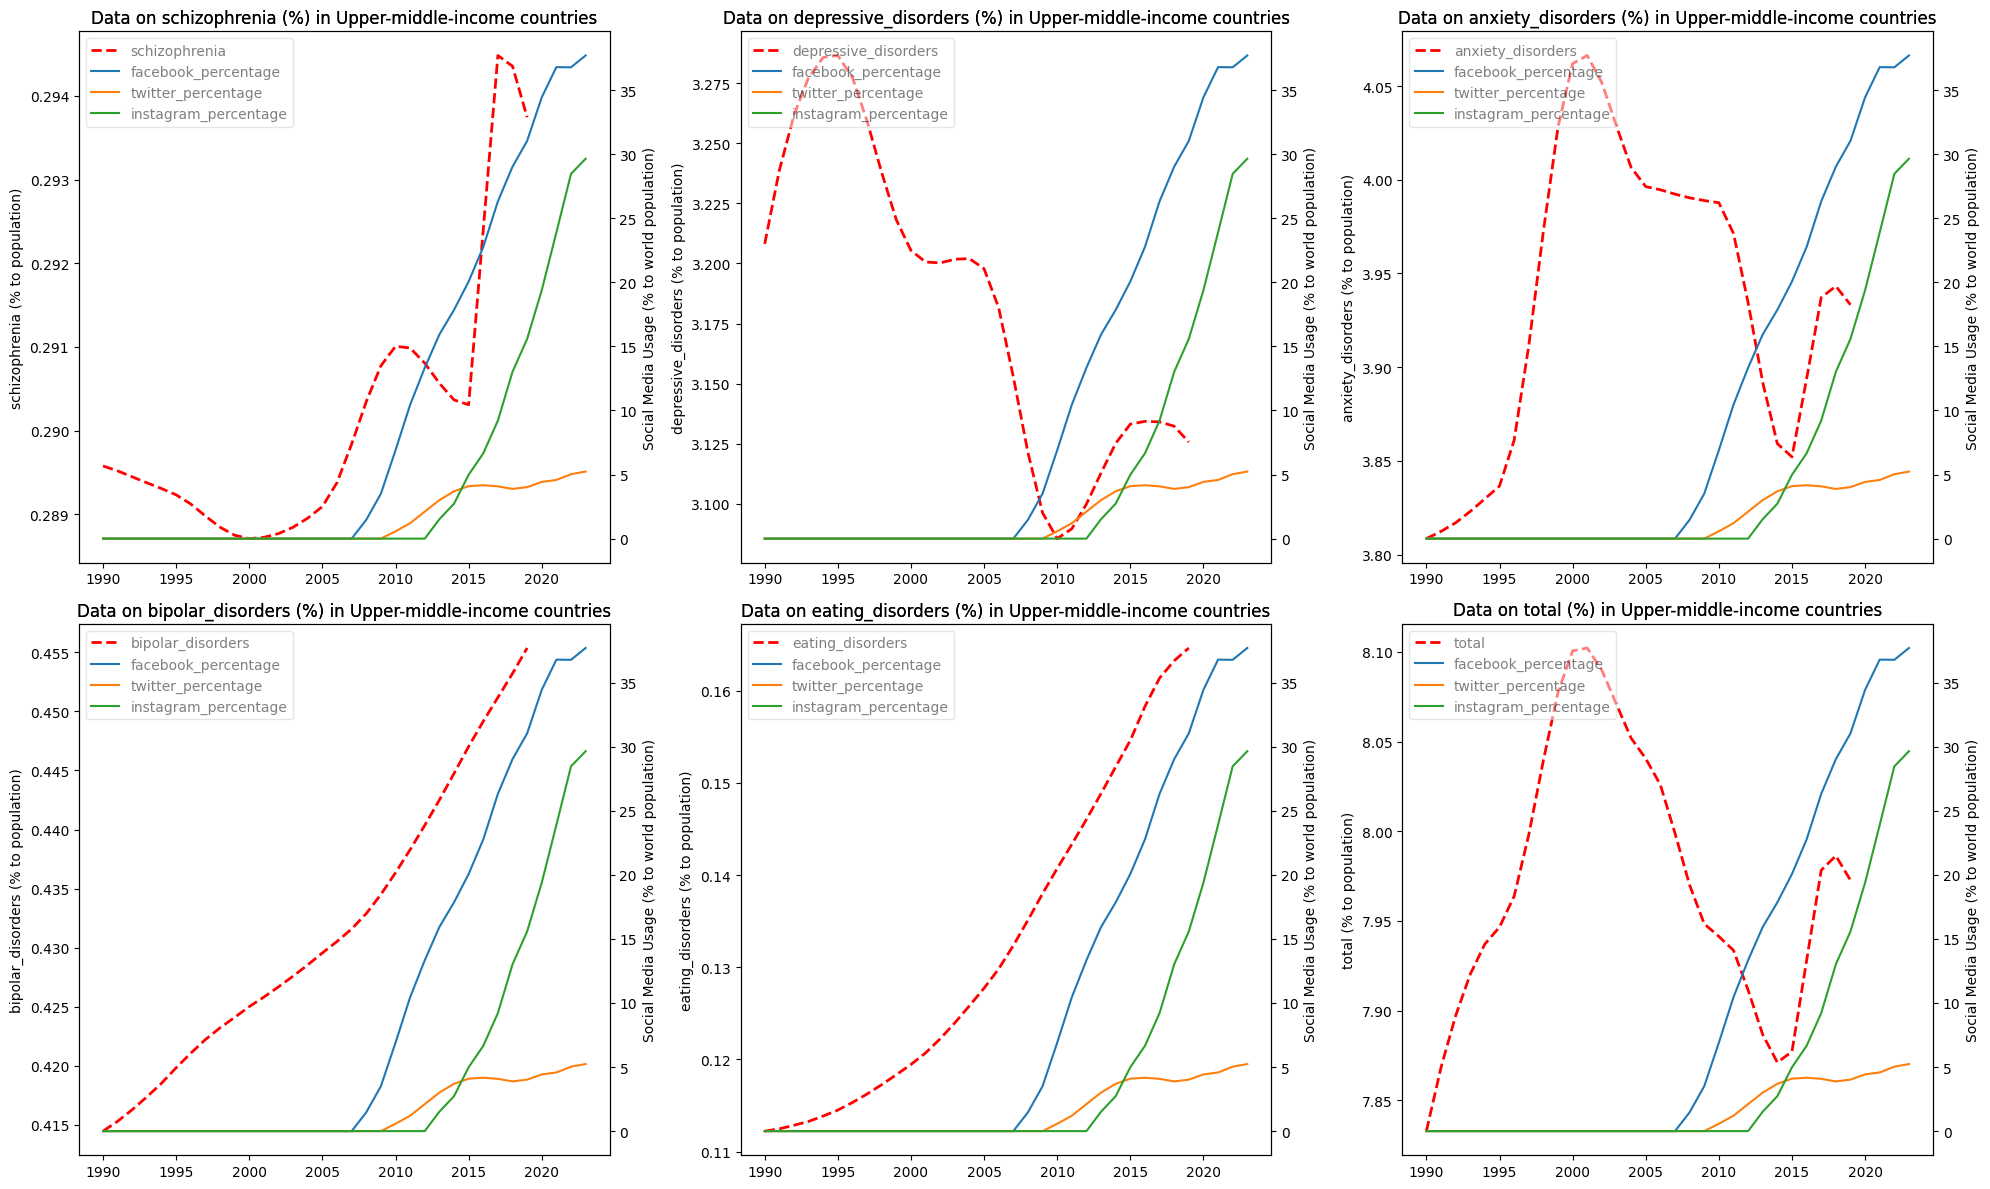

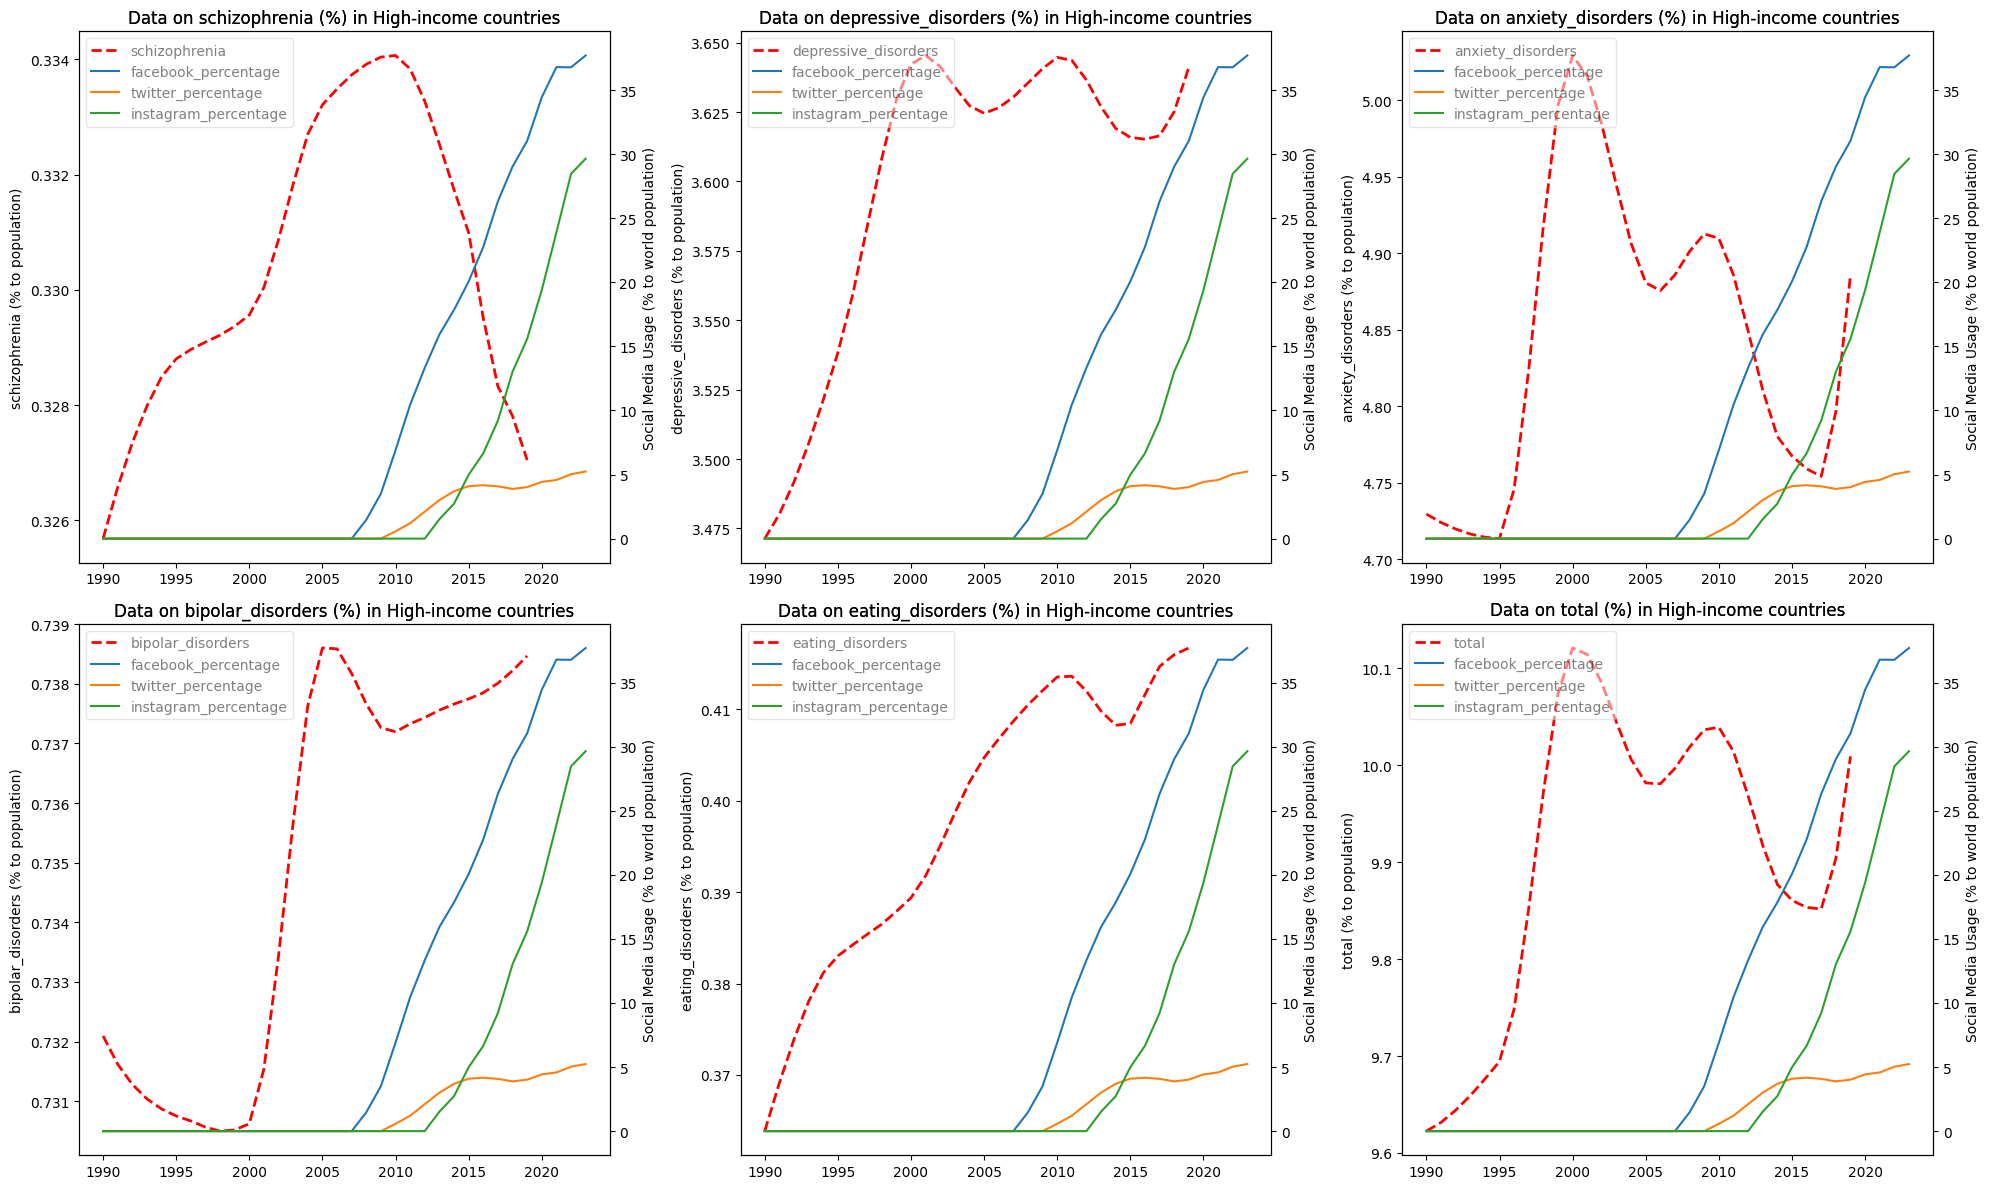

In [67]:
for country_group in country_income_groups:
    plot_with_social_for_country(country_group, illnesses+['total'],figsize=(20,12),legend_alpha=0.5)

## Now let's plot country groups together

In [68]:
def plot_with_social_with_country_groups(country_groups,illness_list,rows=2, cols=3,use_social_media_data=['facebook_percentage','twitter_percentage','instagram_percentage'],
                                 figsize=(22, 12),dataset_to_use=global_trends,
                                 social_media_usage_ds=social_media_usage, legend_alpha=0.7):
    """Plot disorders in illness_lists along with social media users by years of given dataset for a list of countries entities

    Args:
        country_groups: list of countries to display
        illness_list (list): list of illness we display
        rows, cols (int): the grid dimensions
        use_social_media_data (list, optional): _description_. What social media data we use
        figsize (tuple, optional): _description_. Defaults to (12, 8). Our plot size
        dataset_to_use (_type_, optional): _description_. Defaults to global_trends. Trends ds
        social_media_usage_ds: Defaults to social_media_usage. Social media DS
        legend_alpha(float): legend transparency
    """
    bright_colors = ['red', 'purple', 'cyan', 'magenta', 'orange', 'violet']

    def draw_subplot(ax1,select_illness):
        """Helper function draw subplot in selected ax

        Args:
            ax1 (_type_): place in grid
            select_illness (_type_): disorder to plot
        """
        for j, country in enumerate(country_groups):
            
            mental_health_selected_data=dataset_to_use[global_trends['entity']==country]
            
            mental_health_selected_data.reset_index(drop=True, inplace=True)

            mental_health_selected_data.set_index('year')           
            
            illness_title=country
            graph_title='Data on '+select_illness+' (%) '
            
            color = bright_colors[j % len(bright_colors)]
            mental_health_selected_data[select_illness].plot(ax=ax1,title=graph_title, color=color, linestyle='--', linewidth=2, label=country)
                  
        ax1.set_ylabel(illness_title+' (%) ')

        ax2 = ax1.twinx()
        for social_media_info in use_social_media_data:
            social_media_usage_ds[social_media_info].plot(ax=ax2,title=social_media_info)
        ax2.set_ylabel('Social Media Usage (% to world population)')
            
        plt.title(graph_title)
        lines, labels = ax1.get_legend_handles_labels()
        lines2, labels2 = ax2.get_legend_handles_labels()
        
        legend=ax2.legend(lines + lines2, labels + labels2,loc='best')
        legend.get_frame().set_alpha(legend_alpha)
        for text in legend.get_texts():
            text.set_alpha(legend_alpha)



    fig, axs = plt.subplots(rows, cols, figsize=figsize)
    
    # we make an inner loop for making grid of plots:
    for i, illness in enumerate(illness_list):
        row = i // cols
        col = i % cols
        ax = axs[row, col]
        draw_subplot(ax,illness)
    
    plt.tight_layout()
    plt.show()
    

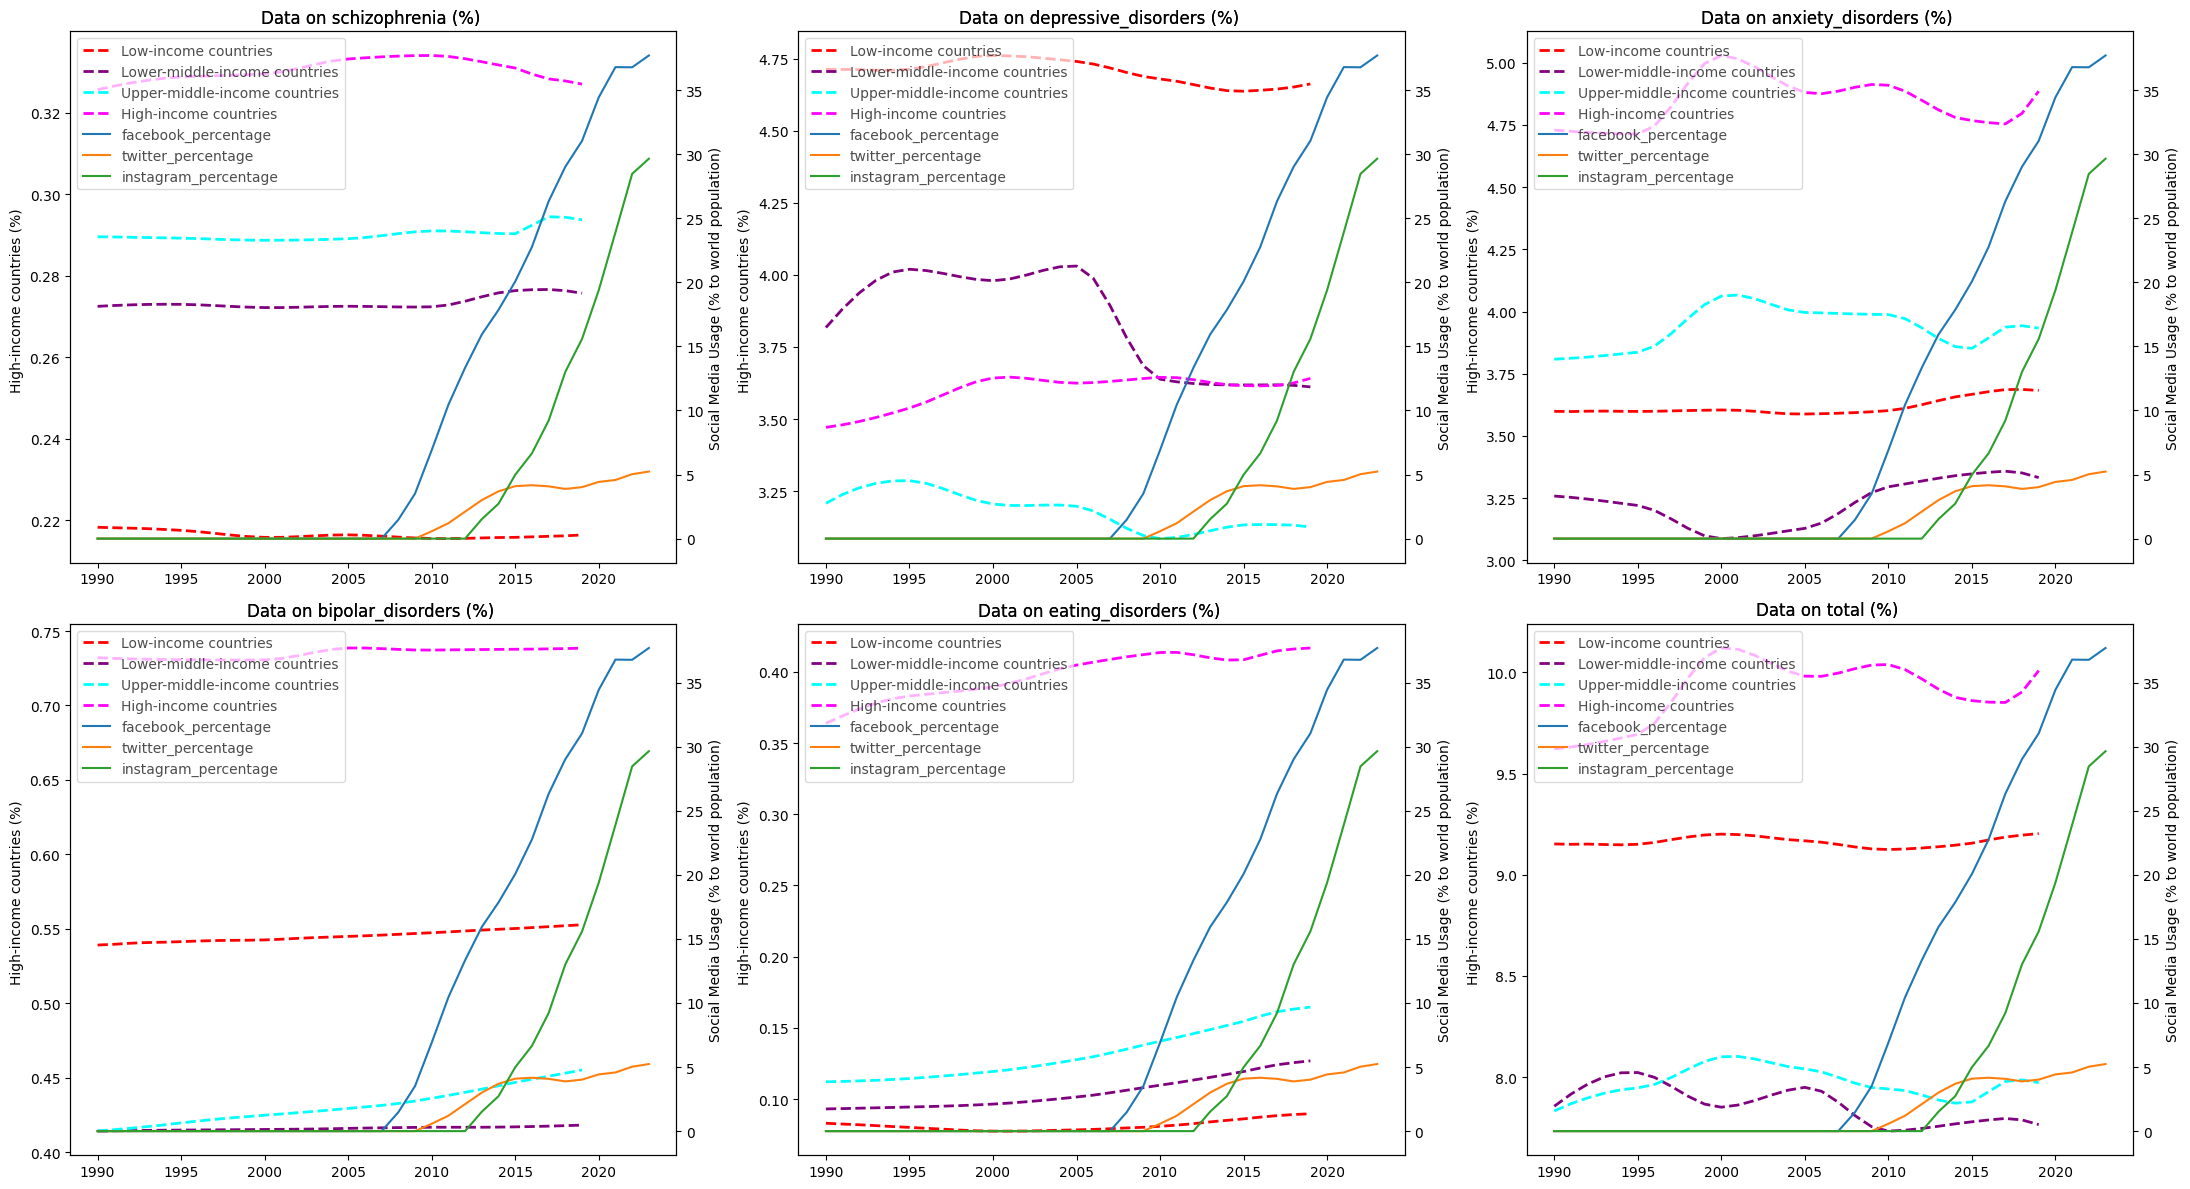

In [69]:
plot_with_social_with_country_groups(country_income_groups, illnesses+['total'])

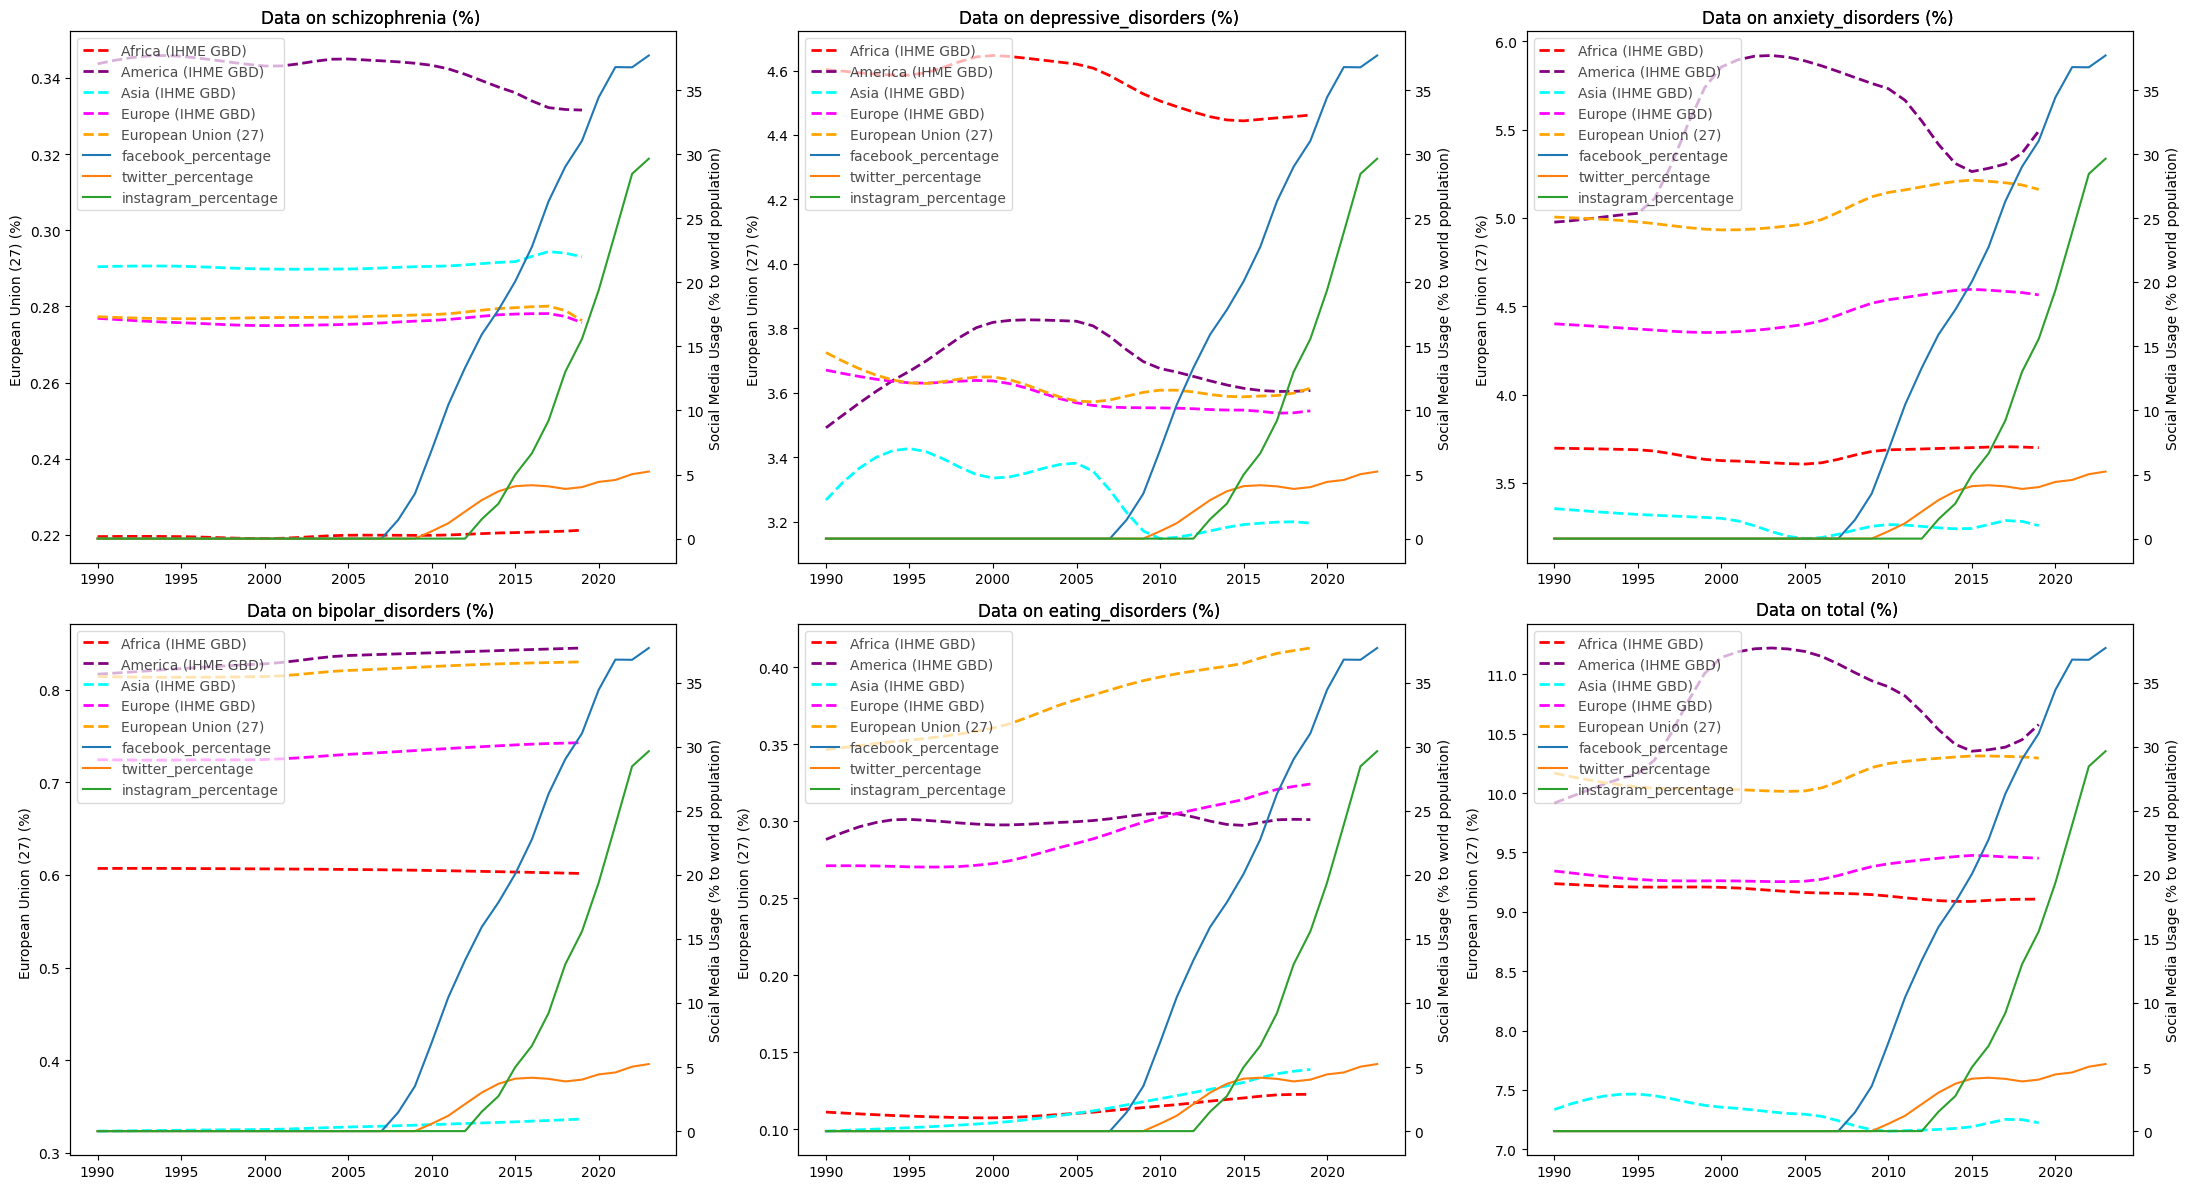

In [70]:
plot_with_social_with_country_groups(continets, illnesses+['total'])

### Global graph here for usage

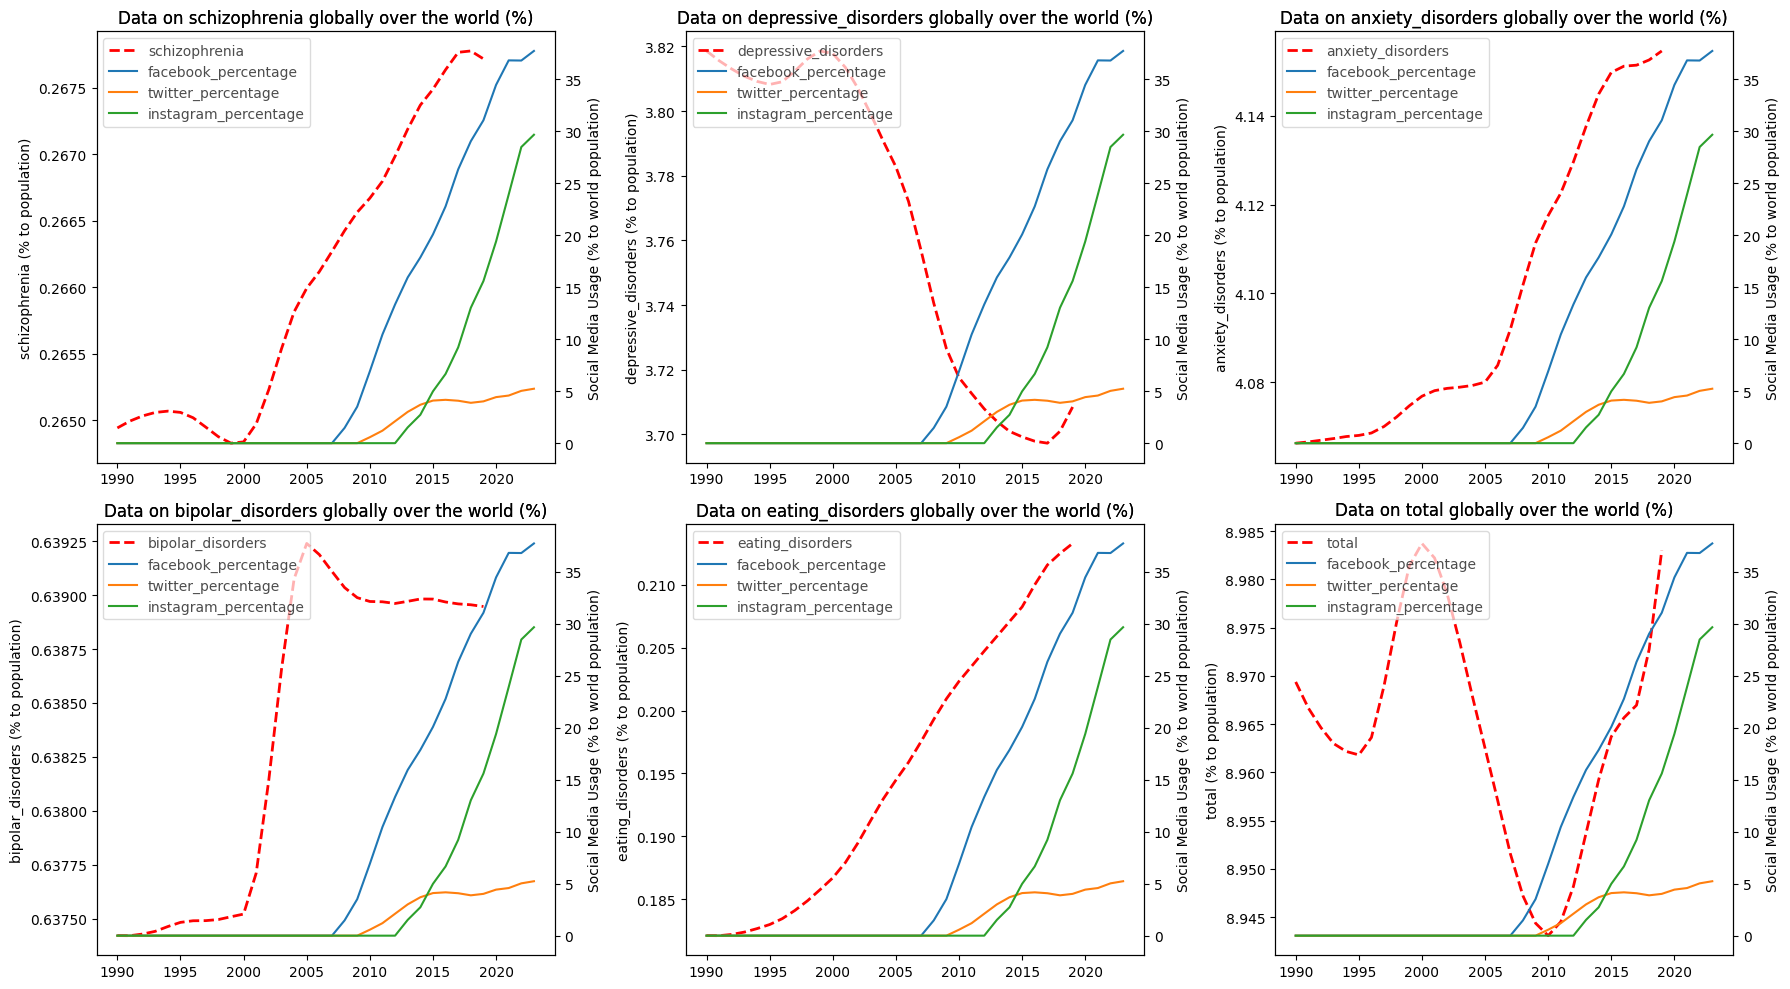

In [71]:
plot_with_social_from_global(illnesses+['total'],dataset_to_use=global_trends_by_years_without_country_groups, figsize=(18,10))



# Conclusions

Looking at the chart, we can see no clear indications of a direct impact of social media on mental health, as was foreseen. Mental health is affected by many factors, and the rising usage of technology, computers, AI, and social media is one of them. However, we can see some patterns in certain types of disorders, starting from nearly the year 2000. We can say that using social media was one aspect of the increasing integration and reliance on technology and computers in daily life, and therefore relevant to our research question of AI's impact on mental health, since AI is a continuation of this line of technological evolution.

We should note that any patterns we may derive from the plots are not large in scale, and they change by points of percent. In plots for country groups, the differences are larger. We should also note that potential flaws in the given dataset should be taken into account.

## Patterns of correlation between mental health and social media usage

Let's see what patterns can be found on the global (worldwide) plots:
1. Decrease in depression from 2000 to 2015.
2. Increase in anxiety and schizophrenia from 2000.
3. Changes in other disorders do not seem correlated.

Let's see what patterns can be found on the plots for country groups based on income level:
1. Decrease in depression for low and low-middle-income countries from 2005, also a decrease for upper-middle-income countries around 2000, but with an increase afterwards.
2. Decrease in anxiety for high and upper-high-income countries, starting from 2000, but with an increase from 2015.
3. Increase in anxiety for low and lower-middle-income countries from 2000.
4. Changes in other disorders do not seem correlated.

Let's see what patterns can be found on the plots for continents:
1. America, Africa, and Asia (until 2010) show a decrease in depression from around 2002. Also, Europe, but with a small increase after 2010.
2. While America shows a decrease in anxiety from 2000 (with an increase from 2015), all other continents show a slight increase in anxiety from 2005.
3. America shows a decrease in schizophrenia, while Asia and Europe show a slight increase.
4. Changes in other disorders do not seem correlated.

## Summary

The variety of changes we observe shows some patterns. We may say they are not of huge value, considering factors such as potential flaws in the dataset and the general understanding that mental health is impacted by many factors. We will not be able to explore and analyze these factors to cancel them out for precise answers to this analysis. 

However, some patterns can be seen. For many country groups and continents, it seems that the use of social media indeed decreases depression by some amount. For high and middle-high-income countries, and for America, the use of social media seems to decrease anxiety, at least from 2000 to 2015. For other continents and for low and middle-low-income countries, anxiety seems to increase. Also, there seems to be some slight increase in other disorders like schizophrenia for some country groups. 

Eating disorders seem to have a general increasing trend and do not seem correlated. The total percentage of disorders for all groups and continents is too volatile and does not seem correlated.


This analysis may serve as a part of further exploration and discussion on our research question.